# How to Minimise Churn While Increasing Revenue on your Customer Base

### Introduction 


Before analyzing our database, I will first give a brief introduction of what Churn is and its importance.

Churn is a common problem in the telecommunications business and refers to the percentage of customers who cancel or do not renew their contract with a telecommunications company in a given period. Churn is a very important indicator for telecommunications companies since it is much more expensive to attract new customers than to retain existing ones, so the analysis of company data can help predict and prevent churn.

### Causes of Customer Churn

1.-Price: If customers find a more cost-effective solution to the problem they want to solve, they may churn. It is essential to present the added value, so customers feel that the purchase is worth the cost.

2.-Product/Market Fit: When the client realises that they cannot achieve their goals with our solution.

3.-User Experience: If the user experience with the product or application is buggy, and glitchy, for them, they will be less likely to use it on a regular basis and build expertise with it.

4.-Customer experience – If a customer's experience connecting with other aspects of the company, such as customer service, executives, technical support, and installation service, is not positive, the likelihood of churn could increase.
     
### Types of Customer Churn


Revenue Churn: This happens when customers downgrade to a cheaper version of our product. 

1.-Competitor Intervention: It is very important to focus on the reason why customers leave the company for our competitors. Are we a bad option for your business? Or is it something we are doing that is driving them away?

2.-Unsuccessful Onboarding: This happens when executives focus only on the sale and not on the right solution for the client as a technology partner.

3.-Desired Feature or Functionality: This happens when we offer all customers the same product, and we do not understand that the product must be adapted to the customer and not the customer to the product.

4.-Company Closure: In these cases, there is not much we can do. But it is essential to have these cases very well-identified in advance and inform our manager.



In this project we will analyze the data we have about Churn, we will study its possible causes and will provide some solutions to reduce Churn and increasing revenue.

## Initial analysis

In [3]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset.

df_churn = pd.read_csv('Telco_Churn.csv')

Here we can see the first 6 rows and columns that are included in our dataset.

We can also see that it has 21 columns in total and we can also see that we have numeric variables and category variables.

In [5]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In this function, we can obtain descriptive statistics of our dataset. This function returns a summary of the statistics of all the columns of the dataset.

The summary includes the number of non-null values, the mean, the standard deviation, the minimum and maximum values, and the 25%, 50%, and 75% percentiles.

It is useful for getting a general idea of the data being worked on and for detecting outliers or missing data.

In this case, we will only analyze the 'tenure' column and the 'MonthlyCharges' column since the 'SeniorCitizen' column is a column with category variables whose values were replaced by '0' and '1' :

1°.- It tells us that we have a total of 7043 rows.

2°.- It gives us the value of the mean, which is useful to have a general idea of our data and to compare different data sets. However, the mean can be influenced by outliers or extremes in our data set.

3°.- It gives us the standard deviation, which is a measure of dispersion that is used to describe the variability or spread of a data set. Where the high standard deviation indicates that the values are more dispersed, while a low standard deviation indicates that the values are more clustered.

4°.- It gives us the minimum value, where we can see that we can already find atypical values within the 'tenure' column.
    
5°.- We can see the 25th, 50th and 75th percentiles. Which are statistical measures that divide a set of ordered data into 100 equal parts. The 50th percentile is the median of the data set, that is, the value that divides the data set into two equal parts. On the other hand, we have the 25th percentile which indicates the value below which 25% of the values of the data set are found, and the 75th percentile indicates the value below which 75% of the values of the data set are found. data set.
    
6°.- Finally we have the maximum, which gives us the maximum value of our column.

In [6]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After our brief analysis of the table above, we'll revisit the 'holding' column that caught our attention.

We can see that the 'tenure' column has a range from '0' to '72' months, indicating the number of months a customer has been with the company's services. Therefore, the values '0' indicate that they are customers who have been with the company for less than 1 month.

Checking the 'tenure' column and counting the '0' values, we realize that there are only 11 values in total and that they belong to clients that are not inside the Churn, so in this case we will replace the '0' values with ' 1' month since they do not affect our analysis.

In [7]:
# Counts of the '0' values inside the 'tenure' column.
filas = df_churn.loc[df_churn['tenure'] == 0]
print(filas)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [8]:
# We replace the values '0' with '1' month.
df_churn['tenure'] = df_churn['tenure'].replace(0, 1)

In [9]:
# We replace the categorical data found within the "Churn" column, which are "No"and "Yes" with 0 and 1.
df_churn['Churn'].replace('No', 0, inplace = True)
df_churn['Churn'].replace('Yes', 1, inplace = True)

The percentage of customers without Churn is: 73.46%
The percentage of customers with Churn is: 26.54%


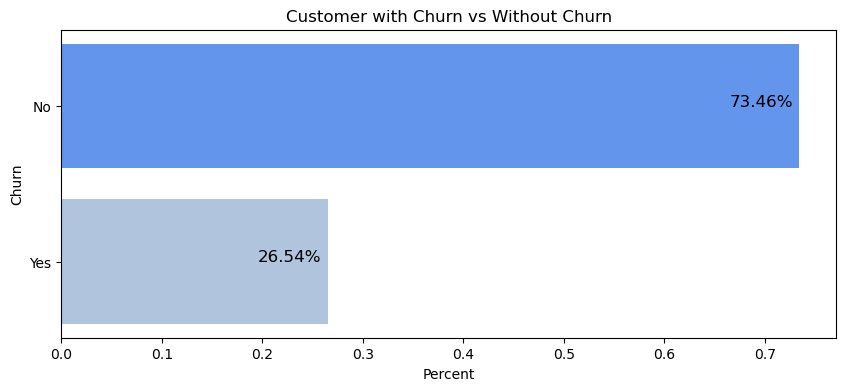

In [10]:
# Customer with Churn vs Without Churn
counts = df_churn['Churn'].value_counts()
percent_no = counts[0] / len(df_churn)
percent_yes = counts[1] / len(df_churn)

print("The percentage of customers without Churn is: {:.2%}".format(percent_no))
print("The percentage of customers with Churn is: {:.2%}".format(percent_yes))

# Grafic Customer with Churn vs Without Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['No', 'Yes']
values = [percent_no, percent_yes]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.070, index - 0, f'{value:.2%}', fontsize = 12, color ='black', weight = '0')
plt.title('Customer with Churn vs Without Churn')
plt.xlabel('Percent')
plt.ylabel('Churn')

plt.show()

## Analysis Customer Features vs Churn

### Analysis Gender vs Churn




The percentage of customers that are Male and are within the Churn is: 49.76%
The percentage of customers that are Female and are within the Churn is: 50.24%


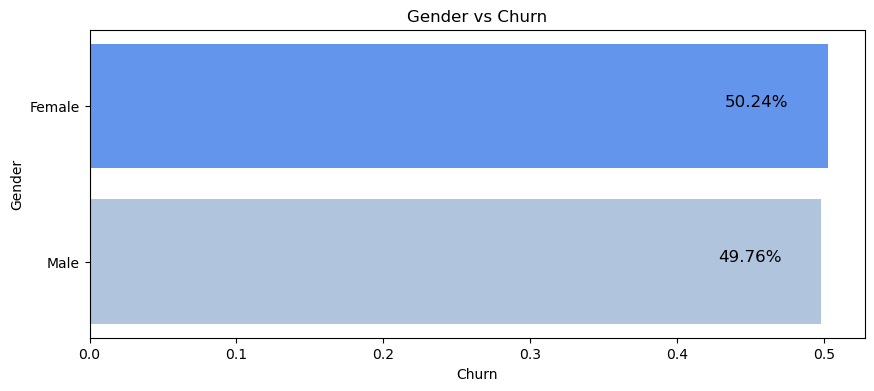

In [11]:
# Analysis Gender vs Churn


# We replace the categorical data found within the "gender" column, which are "Male" and "Female" with 0 and 1.
df_churn['gender'].replace('Male', 0, inplace = True)
df_churn['gender'].replace('Female', 1, inplace = True)


# Gender = 0 and Churn = 1
gender_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['gender'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers that are Male and are within the Churn is: {:.2%}".format(gender_0))


# Gender = 1 and Churn = 1
gender_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['gender'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers that are Female and are within the Churn is: {:.2%}".format(gender_1))


# Grafic Senior Citizens vs Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['Male', 'Female']
values = [gender_0, gender_1]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.070, index - 0, f'{value:.2%}', fontsize = 12, color ='black', weight = '0')
plt.title('Gender vs Churn')
plt.xlabel('Churn')
plt.ylabel('Gender')

plt.show()

### Analysis Senior Citizens vs Churn

Before analyzing the SeniorCitizen column, we must indicate that this column contains:

   0 = 'No' Senior Citizen

   1 = 'Yes' Senior Citizen

Here we compare the 'Senior Citizen' column with the 'Churn' column, which tells us that there is 74.53% that the clients are No Senior Citizens and are among the Churn clients.

And on the other hand, it indicates that there is 25.47% that are Senior Citizens and are among the Churn clients.

Therefore, we can say that customers who are not Older Adults are more likely to leave the company, although analyzing this variable by itself we cannot yet draw conclusions.


The percentage of customers that are not Senior Citizens and are within the Churn is: 74.53%
The percentage of customers that are Senior Citizens and are within the Churn is: 25.47%


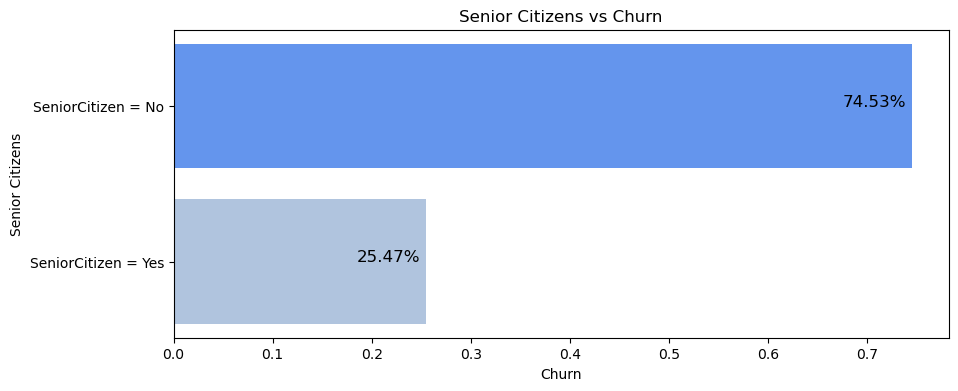

In [12]:
# Analysis Senior Citizens vs Churn

# We replace the categorical data found within the "Senior Citizen" column, which are "No" and "Yes" with 0 and 1.
df_churn['SeniorCitizen'].replace('No', 0, inplace = True)
df_churn['SeniorCitizen'].replace('Yes', 1, inplace = True)


# SeniorCitizen = 0 and Churn = 1
senior_c_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['SeniorCitizen'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])

print("The percentage of customers that are not Senior Citizens and are within the Churn is: {:.2%}".format(senior_c_0))


# SeniorCitizen = 1 and Churn = 1
senior_c_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['SeniorCitizen'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

print("The percentage of customers that are Senior Citizens and are within the Churn is: {:.2%}".format(senior_c_1))


# Grafic Senior Citizens vs Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['SeniorCitizen = No', 'SeniorCitizen = Yes']
values = [senior_c_0, senior_c_1]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.070, index - 0, f'{value:.2%}', fontsize = 12, color ='black', weight = '0')
plt.title('Senior Citizens vs Churn')
plt.xlabel('Churn')
plt.ylabel('Senior Citizens')

plt.show()

### Analysis Partner vs Churn

The percentage of clients that are not Partner and are within the Churn is: 64.21%
The percentage of clients that are Partner and are within the Churn is: 35.79%


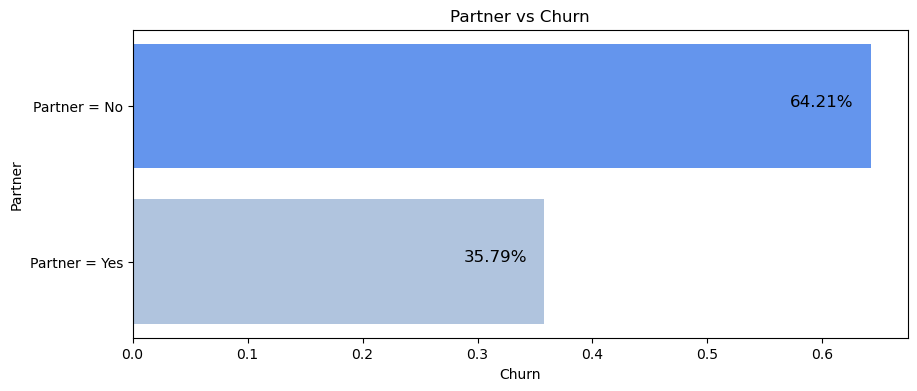

In [13]:
# Analysis Partner vs Churn

# We replace the categorical data found within the "Partner" column, which are "No" and "Yes" with 0 and 1.
df_churn['Partner'].replace('No', 0, inplace = True)
df_churn['Partner'].replace('Yes', 1, inplace = True)


# Partner = 0 and Churn = 1
partner_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Partner'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])

print("The percentage of clients that are not Partner and are within the Churn is: {:.2%}".format(partner_0))


# Partner = 1 and Churn = 1
partner_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Partner'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

print("The percentage of clients that are Partner and are within the Churn is: {:.2%}".format(partner_1))


# Grafic Partner vs Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['Partner = No', 'Partner = Yes']
values = [partner_0, partner_1]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.070, index - 0, f'{value:.2%}', fontsize = 12, color ='black', weight = '0')
plt.title('Partner vs Churn')
plt.xlabel('Churn')
plt.ylabel('Partner')

plt.show()

### Analysis Dependents vs Churn

The percentage of customers that are not Dependents and are within the Churn is: 82.56%
The percentage of customers that are Dependents and are within the Churn is: 17.44%


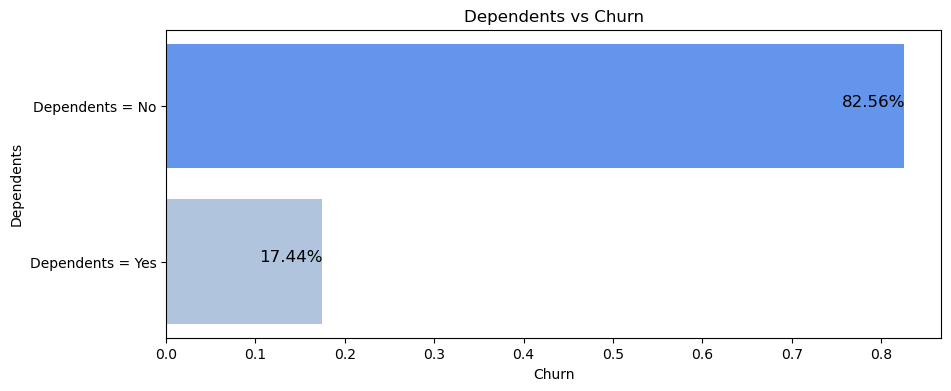

In [14]:
# Analysis Dependents vs Churn

# We replace the categorical data found within the "Dependents" column, which are "No" and "Yes" with 0 and 1.
df_churn['Dependents'].replace('No', 0, inplace = True)
df_churn['Dependents'].replace('Yes', 1, inplace = True)


# Dependents = 0 and Churn = 1
dependents_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Dependents'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers that are not Dependents and are within the Churn is: {:.2%}".format(dependents_0))


# Dependents = 1 and Churn = 1
dependents_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Dependents'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers that are Dependents and are within the Churn is: {:.2%}".format(dependents_1))


# Grafic Dependents vs Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['Dependents = No', 'Dependents = Yes']
values = [dependents_0, dependents_1]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.070, index - 0, f'{value:.2%}', fontsize = 12, color ='black', weight = '0')
plt.title('Dependents vs Churn')
plt.xlabel('Churn')
plt.ylabel('Dependents')

plt.show()

## Analysis Product Features vs Churn

### Analysis Phone Service and MultipleLines vs Churn

By analyzing the Column 'PhoneService' we can identify that 90.90% of the clients that are within the Churn have Phone Service, which means that there is a problem with the service, such as the quality of the product, the quality of the service or the price.

We can also see that whether or not the client has Multiple Lines is indifferent to the Churn, so we can drop the importance of the "MultipleLines" variable and focus only on the "PhoneService" variable.

We will review it later in conjunction with other products since we cannot deduce anything even with this information, we can only indicate that it is within the critical points of Churn.

The percentage of customers with a Phone Service that is within the Churn is: 90.90%
The percentage of customers without Phone Service that are inside the Churn is: 9.10%

The percentage of customers with a MultipleLines that is within the Churn is: 45.48%
The percentage of customers without MultipleLines that are inside the Churn is: 45.43%


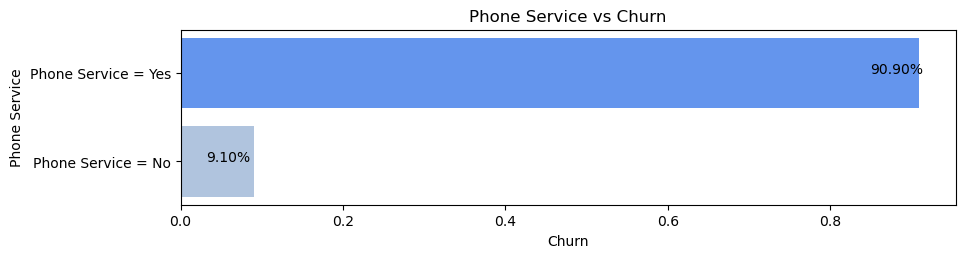

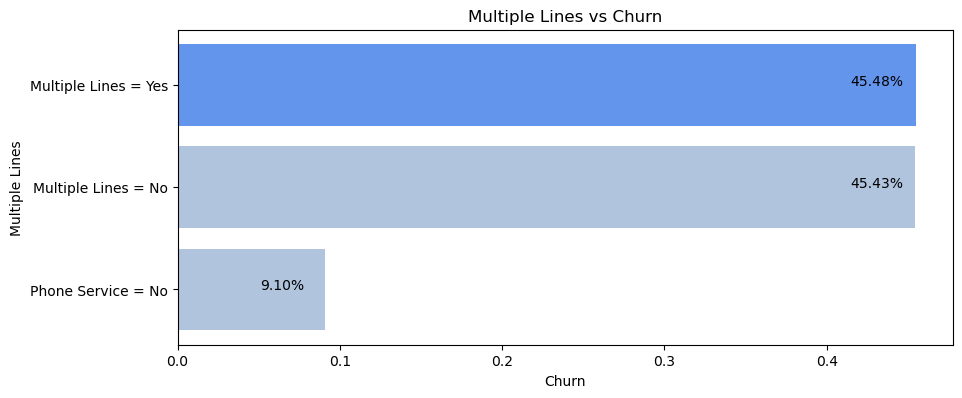

In [15]:
# Analysis Phone Service and MultipleLines vs Churn


# We replace the categorical data in the "MultipleLines", "No" and "Yes" columns with 0 and 1
df_churn['PhoneService'].replace('No', 0, inplace = True)
df_churn['PhoneService'].replace('Yes', 1, inplace = True)


# PhoneService = 1 and Churn = 1
phoneservice1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PhoneService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with a Phone Service that is within the Churn is: {:.2%}".format(phoneservice1))


# PhoneService = 0 and Churn = 1
phoneservice0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PhoneService'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Phone Service that are inside the Churn is: {:.2%}".format(phoneservice0))

# Analysis MultipleLines vs Churn

# We replace the categorical data in the "MultipleLines", "No", "Yes" and "No phone service" columns with 0, 1 and 2
df_churn['MultipleLines'].replace('No', 0, inplace = True)
df_churn['MultipleLines'].replace('Yes', 1, inplace = True)
df_churn['MultipleLines'].replace('No phone service', 2, inplace = True)

# MultipleLines = 1 and Churn = 1
multiplelines1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['MultipleLines'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("\nThe percentage of customers with a MultipleLines that is within the Churn is: {:.2%}".format(multiplelines1))


# MultipleLines = 0 and Churn = 1
multiplelines0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['MultipleLines'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without MultipleLines that are inside the Churn is: {:.2%}".format(multiplelines0))


# Grafic Phone Service vs Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['Phone Service = Yes', 'Phone Service = No']
values = [phoneservice1, phoneservice0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.060, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Phone Service vs Churn')
plt.xlabel('Churn')
plt.ylabel('Phone Service')

# Grafic MultipleLines vs Churn
colors = ['lightsteelblue', 'lightsteelblue', 'cornflowerblue']
labels = ['Multiple Lines = Yes', 'Multiple Lines = No', 'Phone Service = No']
values = [multiplelines1, multiplelines0, phoneservice0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 9))
plt.subplot(2, 1, 2)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.040, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Multiple Lines vs Churn')
plt.xlabel('Churn')
plt.ylabel('Multiple Lines')

plt.show()

### Analysis Internet Service vs Churn

Reviewing the 'InternetService' column, we can identify that customers who have Internet via Fiber Optic have 69.40% who are among customers with Churn.
This shows us, just like the PhoneService product, that there is a problem with this service, it can be the quality of the product, the price or the after-sales service.

The percentage of customers without Internet Service that are inside the Churn is: 6.05%
The percentage of customers with DSL Internet Service that are inside the Churn is: 24.56%
The percentage of customers with Fiber Optic Internet Service that are inside the Churn is: 69.40%


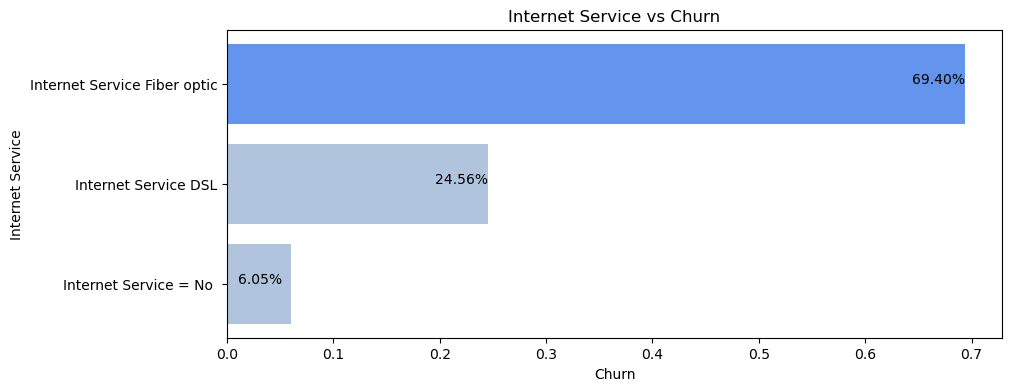

In [16]:
# Analysis Internet Service vs Churn

# We replace the categorical data in the "InternetService", "No", "DSL" and "Fiber optic" columns with 0, 1 and 2
df_churn['InternetService'].replace('No', 0, inplace = True)
df_churn['InternetService'].replace('DSL', 1, inplace = True)
df_churn['InternetService'].replace('Fiber optic', 2, inplace = True)


# InternetService = 0 and Churn = 1
internet0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['InternetService'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Internet Service that are inside the Churn is: {:.2%}".format(internet0))


# InternetService = 1 and Churn = 1 
internet_dsl_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with DSL Internet Service that are inside the Churn is: {:.2%}".format(internet_dsl_1))


# InternetService = 2 and Churn = 1 
internet_fop_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Fiber Optic Internet Service that are inside the Churn is: {:.2%}".format(internet_fop_2))


# Grafic Internet Service vs Churn
colors = ['lightsteelblue','lightsteelblue', 'cornflowerblue' ]
labels = ['Internet Service = No ', 'Internet Service DSL', 'Internet Service Fiber optic' ]
values = [internet0, internet_dsl_1, internet_fop_2 ]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.050, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Internet Service vs Churn')
plt.xlabel('Churn')
plt.ylabel('Internet Service')

plt.show()

#### Analysis Online Security vs Churn

The percentage of customers with Online Security that are inside the Churn is: 15.78%
The percentage of customers without Online Security that are inside the Churn is: 78.17%


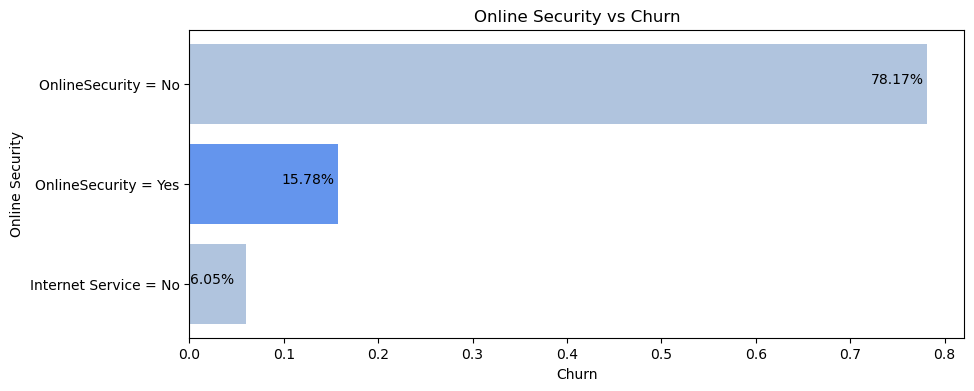

In [17]:
# Analysis Online Security vs Churn

# We replace the categorical data in the "OnlineSecurity", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['OnlineSecurity'].replace('No', 0, inplace = True)
df_churn['OnlineSecurity'].replace('No internet service', 1, inplace = True)
df_churn['OnlineSecurity'].replace('Yes', 2, inplace = True)


# OnlineSecurity = 2 and Churn = 1
online_sec_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineSecurity'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Online Security that are inside the Churn is: {:.2%}".format(online_sec_2))


# OnlineSecurity = 0 and Churn = 1
online_sec_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineSecurity'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Online Security that are inside the Churn is: {:.2%}".format(online_sec_0))


#  Grafic Online Security vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['OnlineSecurity = Yes', 'OnlineSecurity = No', 'Internet Service = No']
values = [online_sec_2, online_sec_0, internet0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.060, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Online Security vs Churn')
plt.xlabel('Churn')
plt.ylabel('Online Security')

plt.show()

Among the 15.78% of the customers that have Online Security, 9.79% are customers with Fiber Optic and 5.99% with DSL

The percentage of customers with Online Security and Fiber Optic that are inside the Churn is: 9.79%
The percentage of customers with Online Security and DSL that are inside the Churn is: 5.99%


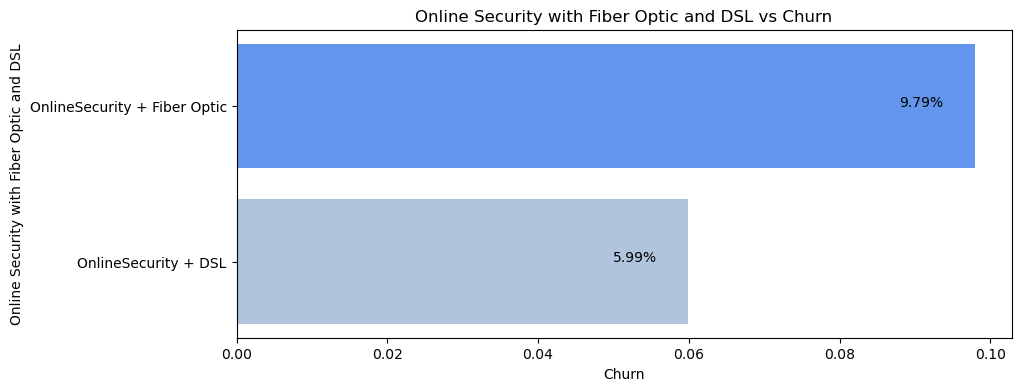

In [18]:
# Online Security with Fiber Optic and DSL vs Churn


# OnlineSecurity = Yes + Fiber Optic and Churn = 1
online_sec_fo = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineSecurity'] == 2) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Online Security and Fiber Optic that are inside the Churn is: {:.2%}".format(online_sec_fo))


# OnlineSecurity = Yes + DSL and Churn = 1
online_sec_dsl = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineSecurity'] == 2) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Online Security and DSL that are inside the Churn is: {:.2%}".format(online_sec_dsl))

#  Grafic Online Security with Fiber Optic and DSL vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['OnlineSecurity + Fiber Optic', 'OnlineSecurity + DSL']
values = [online_sec_fo, online_sec_dsl]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.010, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Online Security with Fiber Optic and DSL vs Churn')
plt.xlabel('Churn')
plt.ylabel('Online Security with Fiber Optic and DSL')

plt.show()

#### Analysis Online Backup vs Churn

The percentage of customers without Online Backup that are inside the Churn is: 65.97%
The percentage of customers with Online Backup that are inside the Churn is: 27.98%


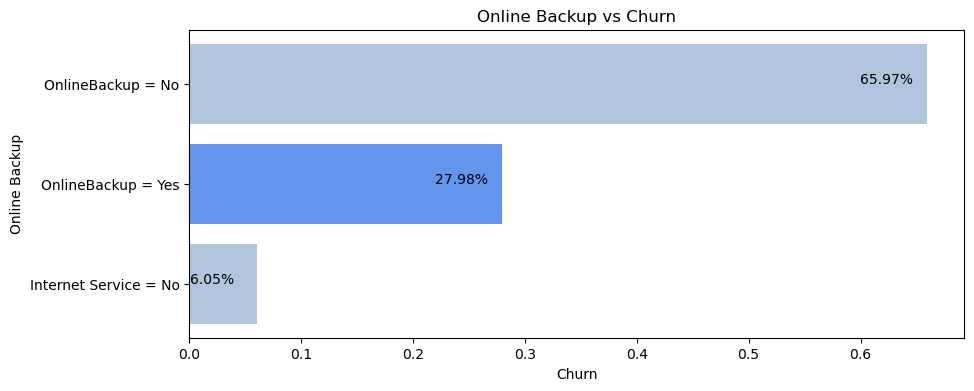

In [19]:
# Analysis Online Backup vs Churn

# We replace the categorical data in the "OnlineBackup", "No" and "Yes" columns with 0 and 1
df_churn['OnlineBackup'].replace('No', 0, inplace = True)
df_churn['OnlineBackup'].replace('Yes', 1, inplace = True)


# Online Backup = 0 and Churn = 1
online_backup_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineBackup'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Online Backup that are inside the Churn is: {:.2%}".format(online_backup_0))


# Online Backup = 1 and Churn = 1
online_backup_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineBackup'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Online Backup that are inside the Churn is: {:.2%}".format(online_backup_1))


#  Grafic Online Security vs Churn
colors = ['lightsteelblue','cornflowerblue', 'lightsteelblue']
labels = ['OnlineBackup = No', 'OnlineBackup = Yes', 'Internet Service = No']
values = [online_backup_0, online_backup_1, internet0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.060, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Online Backup vs Churn')
plt.xlabel('Churn')
plt.ylabel('Online Backup')

plt.show()

Among the 27.98% of the customers that have Online Backup, 21.78% are customers with Fiber Optic and 6.21% with DSL

The percentage of customers with Online Backup and Fiber Optic that are inside the Churn is: 21.78%
The percentage of customers with Online Backup and DSL that are inside the Churn is: 6.21%


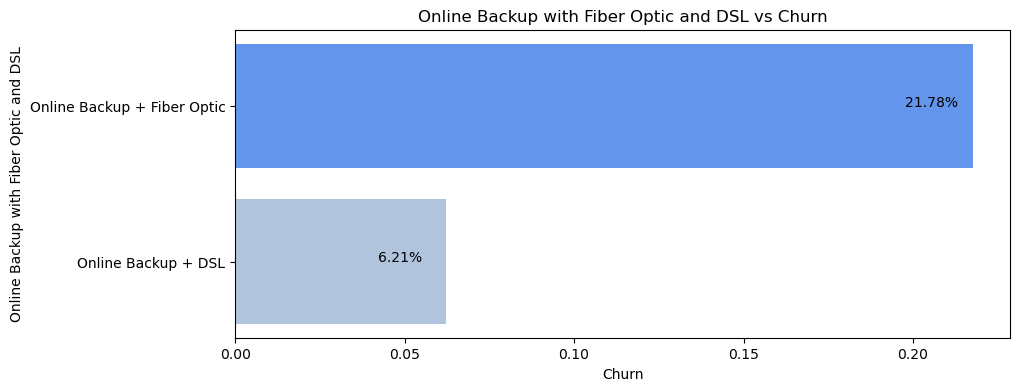

In [20]:
# Online Backup with Fiber Optic and DSL vs Churn

# Online Backup = Yes + Fiber Optic and Churn = 1
online_backup_fo = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineBackup'] == 1) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Online Backup and Fiber Optic that are inside the Churn is: {:.2%}".format(online_backup_fo))


# Online Backup = Yes + DSL and Churn = 1
online_backup_dsl = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['OnlineBackup'] == 1) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Online Backup and DSL that are inside the Churn is: {:.2%}".format(online_backup_dsl))

#  Grafic Online Backup with Fiber Optic and DSL vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['Online Backup + Fiber Optic', 'Online Backup + DSL']
values = [online_backup_fo, online_backup_dsl]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.020, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Online Backup with Fiber Optic and DSL vs Churn')
plt.xlabel('Churn')
plt.ylabel('Online Backup with Fiber Optic and DSL')

plt.show()

#### Analysis Device Protection vs Churn

The percentage of customers with Device Protection that are inside the Churn is: 29.16%
The percentage of customers without Device Protection that are inside the Churn is: 64.79%


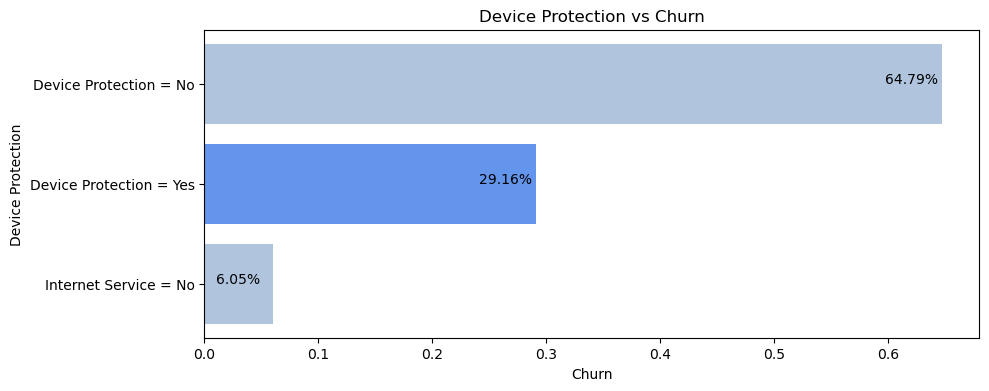

In [21]:
# Analysis Device Protection vs Churn

# We replace the categorical data in the "DeviceProtection", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['DeviceProtection'].replace('No', 0, inplace = True)
df_churn['DeviceProtection'].replace('No internet service', 1, inplace = True)
df_churn['DeviceProtection'].replace('Yes', 2, inplace = True)


# DeviceProtection = 2 and Churn = 1
device_pro_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['DeviceProtection'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Device Protection that are inside the Churn is: {:.2%}".format(device_pro_2))


# DeviceProtection = 0 and Churn = 1
device_pro_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['DeviceProtection'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Device Protection that are inside the Churn is: {:.2%}".format(device_pro_0))


# Grafic Device Protection vs Churn
colors = ['lightsteelblue','cornflowerblue', 'lightsteelblue']
labels = ['Device Protection = Yes', 'Device Protection = No', 'Internet Service = No']
values = [device_pro_2, device_pro_0, internet0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.050, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Device Protection vs Churn')
plt.xlabel('Churn')
plt.ylabel('Device Protection')

plt.show()

Among the 29.16% of the customers that have Device Protection, 22.90% are customers with Fiber Optic and 6.26% with DSL

The percentage of customers with Device Protection and Fiber Optic that are inside the Churn is: 22.90%
The percentage of customers with Device Protection and DSL that are inside the Churn is: 6.26%


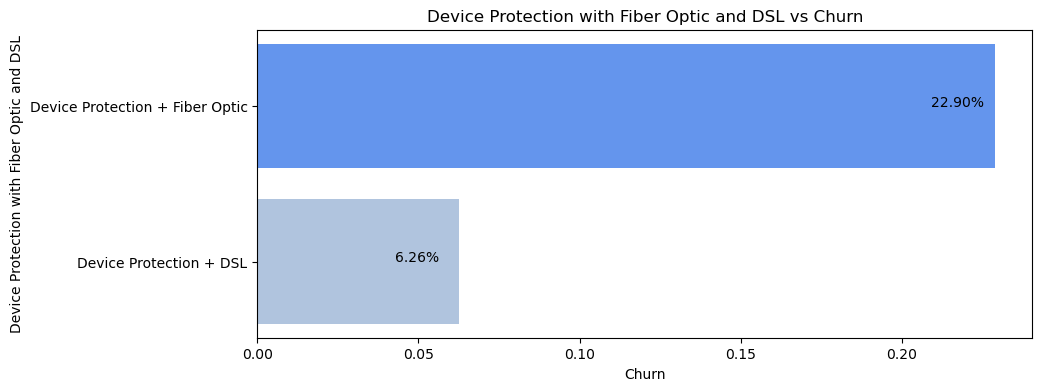

In [22]:
# Device Protection with Fiber Optic and DSL vs Churn

# Device Protection = Yes + Fiber Optic and Churn = 1
device_pro_fo = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['DeviceProtection'] == 2) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Device Protection and Fiber Optic that are inside the Churn is: {:.2%}".format(device_pro_fo))


# Device Protection = Yes + DSL and Churn = 1
device_pro_dsl = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['DeviceProtection'] == 2) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Device Protection and DSL that are inside the Churn is: {:.2%}".format(device_pro_dsl))

#  Grafic Device Protection with Fiber Optic and DSL vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['Device Protection + Fiber Optic', 'Device Protection + DSL']
values = [device_pro_fo, device_pro_dsl]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.020, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Device Protection with Fiber Optic and DSL vs Churn')
plt.xlabel('Churn')
plt.ylabel('Device Protection with Fiber Optic and DSL')

plt.show()

#### Analysis Tech Support vs Churn

The percentage of customers with Tech Support that are inside the Churn is: 16.59%
The percentage of customers without Tech Support that are inside the Churn is: 77.37%


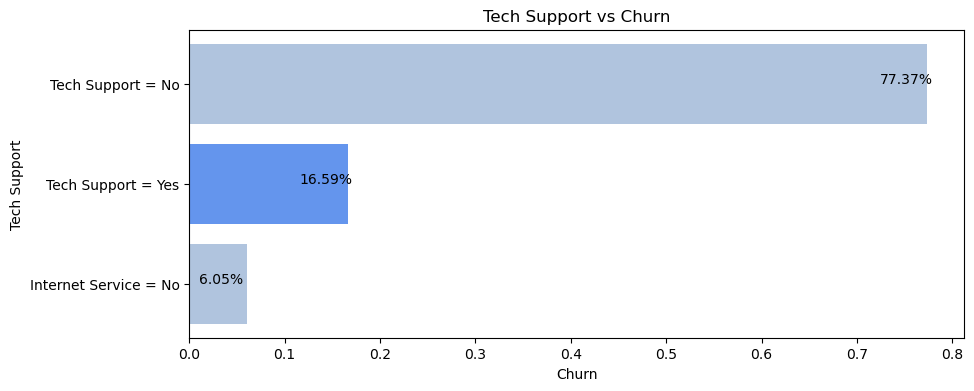

In [23]:
# Analysis Tech Support vs Churn

# We replace the categorical data in the "TechSupport", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['TechSupport'].replace('No', 0, inplace = True)
df_churn['TechSupport'].replace('No internet service', 1, inplace = True)
df_churn['TechSupport'].replace('Yes', 2, inplace = True)


# TechSupport = 2 and Churn = 1
tech_sup_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['TechSupport'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Tech Support that are inside the Churn is: {:.2%}".format(tech_sup_2))


# TechSupport = 0
tech_sup_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['TechSupport'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Tech Support that are inside the Churn is: {:.2%}".format(tech_sup_0))

# Grafic Tech Support vs Churn
colors = ['lightsteelblue','cornflowerblue', 'lightsteelblue']
labels = ['Tech Support = Yes', 'Tech Support = No','Internet Service = No']
values = [tech_sup_2, tech_sup_0, internet0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.050, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Tech Support vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tech Support')

plt.show()

Among the 16.59% of the customers that have Tech Support, 10.49% are customers with Fiber Optic and 6.10% with DSL

The percentage of customers with Tech Support and Fiber Optic that are inside the Churn is: 10.49%
The percentage of customers with Tech Support and DSL that are inside the Churn is: 6.10%


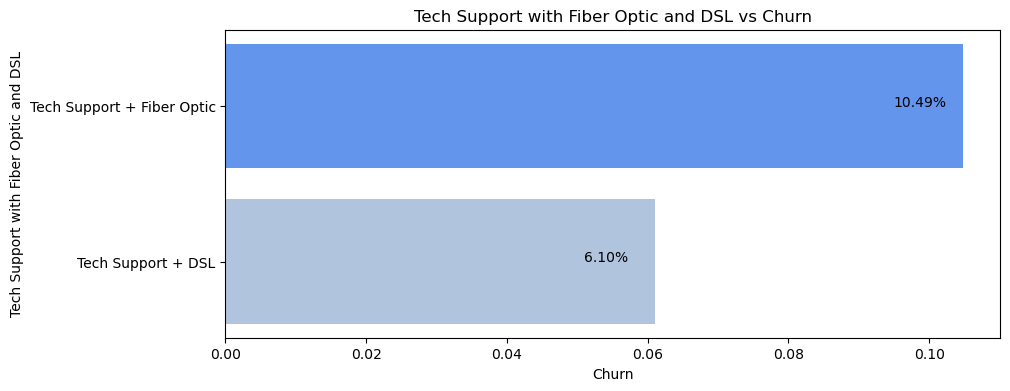

In [24]:
# Tech Support with Fiber Optic and DSL vs Churn

# Tech Support = Yes + Fiber Optic and Churn = 1
tech_sup_fo = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['TechSupport'] == 2) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Tech Support and Fiber Optic that are inside the Churn is: {:.2%}".format(tech_sup_fo))


# Tech Support = Yes + DSL and Churn = 1
tech_sup_dsl = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['TechSupport'] == 2) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Tech Support and DSL that are inside the Churn is: {:.2%}".format(tech_sup_dsl))

#  Grafic Tech Support with Fiber Optic and DSL vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['Tech Support + Fiber Optic', 'Tech Support + DSL']
values = [tech_sup_fo, tech_sup_dsl]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.010, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Tech Support with Fiber Optic and DSL vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tech Support with Fiber Optic and DSL')

plt.show()

#### Analysis Streaming TV and Streaming Movie vs Churn



In the 'StreamingTV' column we can identify that both the clients that have the service and those that do not have the service have a close percentage of clients that are within the Churn, so we could indicate that there is a problem with the product, service or its price.

Therefore we would recommend reviewing this product to identify if the problem is with the quality of the service, the price or perhaps with the customer service.

The percentage of customers with Streaming TV that are inside the Churn is: 43.55%
The percentage of customers without Streaming TV that are inside the Churn is: 50.40%

The percentage of customers with Streaming Movie that are inside the Churn is: 43.77%
The percentage of customers without Streaming Movie that are inside the Churn is: 50.19%


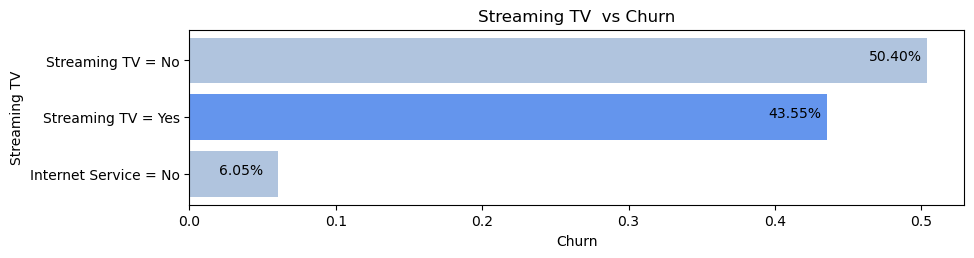

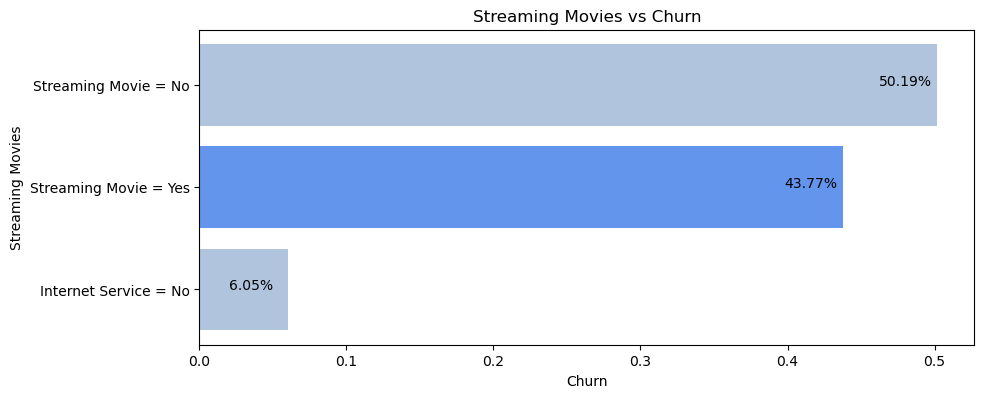

In [25]:
# Analysis Streaming TV vs Churn

# We replace the categorical data in the "StreamingTV", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['StreamingTV'].replace('No', 0, inplace = True)
df_churn['StreamingTV'].replace('No internet service', 1, inplace = True)
df_churn['StreamingTV'].replace('Yes', 2, inplace = True)


# StreamingTV = 2 and Churn = 1
streaming_tv_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingTV'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Streaming TV that are inside the Churn is: {:.2%}".format(streaming_tv_2))


# StreamingTV = 0 and Churn = 1
streaming_tv_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingTV'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Streaming TV that are inside the Churn is: {:.2%}".format(streaming_tv_0))


# Analysis Streaming Movies vs Churn

# We replace the categorical data in the "StreamingTV", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['StreamingMovies'].replace('No', 0, inplace = True)
df_churn['StreamingMovies'].replace('No internet service', 1, inplace = True)
df_churn['StreamingMovies'].replace('Yes', 2, inplace = True)


# Streaming Movies = 2 and Churn = 1 
streaming_m_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingMovies'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("\nThe percentage of customers with Streaming Movie that are inside the Churn is: {:.2%}".format(streaming_m_2))


# Streaming Movies = 0 and Churn = 1
streaming_m_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingMovies'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers without Streaming Movie that are inside the Churn is: {:.2%}".format(streaming_m_0))


# Grafic Streaming TV vs Churn
colors = ['lightsteelblue','cornflowerblue', 'lightsteelblue']
labels = ['Streaming TV = Yes', 'Streaming TV = No', 'Internet Service = No']
values = [streaming_tv_2, streaming_tv_0, internet0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.040, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Streaming TV  vs Churn')
plt.xlabel('Churn')
plt.ylabel('Streaming TV')

# Grafic Streaming Movies  vs Churn
colors = ['lightsteelblue','cornflowerblue', 'lightsteelblue']
labels = ['Streaming Movie = Yes', 'Streaming Movie = No', 'Internet Service = No']
values = [streaming_m_2, streaming_m_0, internet0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 9))
plt.subplot(2, 1, 2)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.040, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Streaming Movies vs Churn')
plt.xlabel('Churn')
plt.ylabel('Streaming Movies')

plt.show()

Among the 43.55% of the customers that have Streaming TV, 36.76% are customers with Fiber Optic and 6.80% with DSL

The percentage of customers with Streaming TV and Fiber Optic that are inside the Churn is: 36.76%
The percentage of customers with Streaming TV and DSL that are inside the Churn is: 6.80%


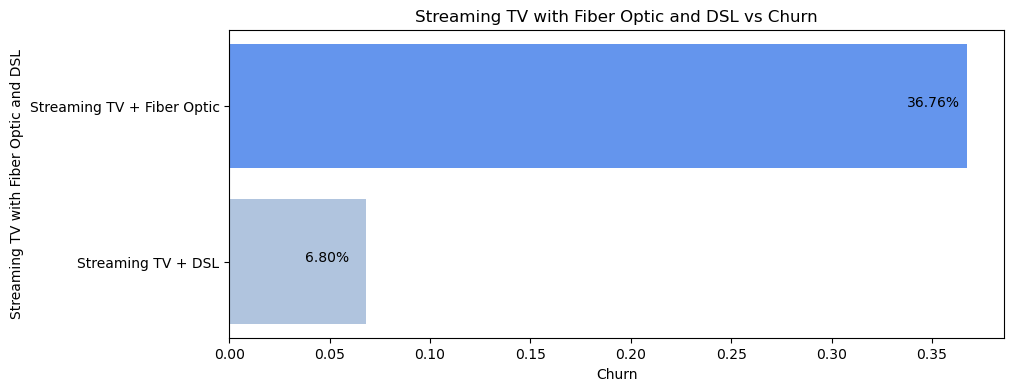

In [26]:
# Streaming TV with Fiber Optic and DSL vs Churn

# Streaming TV = Yes + Fiber Optic and Churn = 1
streaming_tv_fo = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingTV'] == 2) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Streaming TV and Fiber Optic that are inside the Churn is: {:.2%}".format(streaming_tv_fo))


# Streaming TV = Yes + DSL and Churn = 1
streaming_tv_dsl = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingTV'] == 2) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Streaming TV and DSL that are inside the Churn is: {:.2%}".format(streaming_tv_dsl))

#  Grafic Streaming TV with Fiber Optic and DSL vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['Streaming TV + Fiber Optic', 'Streaming TV + DSL']
values = [streaming_tv_fo, streaming_tv_dsl]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.030, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Streaming TV with Fiber Optic and DSL vs Churn')
plt.xlabel('Churn')
plt.ylabel('Streaming TV with Fiber Optic and DSL')

plt.show()

Among the 43.77% of the customers that have Streaming Movie, 36.44% are customers with Fiber Optic and 7.33% with DSL

The percentage of customers with Streaming Movie and Fiber Optic that are inside the Churn is: 36.44%
The percentage of customers with Streaming Movie and DSL that are inside the Churn is: 7.33%


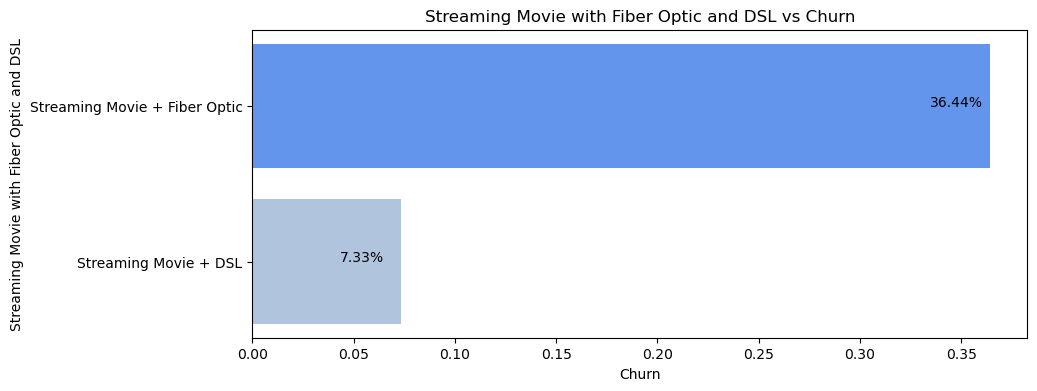

In [27]:
# Streaming Movie with Fiber Optic and DSL vs Churn

# Streaming Movie = Yes + Fiber Optic and Churn = 1
streaming_m_fo = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingMovies'] == 2) & (df_churn['InternetService'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Streaming Movie and Fiber Optic that are inside the Churn is: {:.2%}".format(streaming_m_fo))


# Streaming Movie = Yes + DSL and Churn = 1
streaming_m_dsl = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['StreamingMovies'] == 2) & (df_churn['InternetService'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])
print("The percentage of customers with Streaming Movie and DSL that are inside the Churn is: {:.2%}".format(streaming_m_dsl))

#  Grafic Streaming Movie with Fiber Optic and DSL vs Churn
colors = ['lightsteelblue','cornflowerblue','lightsteelblue']
labels = ['Streaming Movie + Fiber Optic', 'Streaming Movie + DSL']
values = [streaming_m_fo, streaming_m_dsl]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.030, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Streaming Movie with Fiber Optic and DSL vs Churn')
plt.xlabel('Churn')
plt.ylabel('Streaming Movie with Fiber Optic and DSL')

plt.show()

#### Summary Product Features vs Churn

In short, after our analysis of the Product Characteristics found within the Churn, we can conclude that the customers who have Internet service and Fiber Optic service are the customers with the highest Churn.

This means that the Fiber Optic product may have some quality problems and is not working properly.

## Analysis Contract Features vs Churn

### Analysis Contract and Tenure vs Churn

Observing the 'Contract' column we can identify that it contains categorical variables, which we must replace with numerical values to analyze.
This column indicates the length of the contract that the customer has.

Where:

   0 = 'Month-to-month'

   1 = 'Two years'

   2 = 'One year'

In our analysis, we compare the 'Contract' column with the clients that are with Churn, where we can identify that the clients that have a "Month-to-month" contract have the highest percentage within the clients with Churn with 88.55%.

Therefore, we could indicate that if we change the term of the 'Month-to-month' contracts to 'One year' we could decrease the Churn.


Analyzing the 'Tenure' column we can identify that it has a range of 1 to 72 months. Previously we replaced the '0' values with '1' values.

To analyze the 'Tenure' column against the 'Churn' column, we will group the variables in the 'Tenure' column as follows:

A.- Tenure <= 12 months, Churn = 1

B.- Tenure > 12 months and <= 24 months, Churn = 1

C.- Tenure > 24 months and <= 36 months, Churn = 1

D.- Tenure > 36 months and <= 48 months, Churn = 1

E.- Tenure > 48 months and <= 60 months, Churn = 1

F.- Tenure > 60 months and <= 72 months, Churn = 1

According to our analysis, we can conclude that clients with tenure less than or equal to 12 months have a percentage of 55.48% of which are among customers with Churn, we could even include all clients who have a tenure less than or equal to 48 months, which add up to 88.55% of the customers within the Churn.

In conclusion, within the characteristics of the contracts, the main problem is not the permanence, but the main problem is the month-to-month contract model. With the information we have, we cannot indicate what the real problem is, but we can detect that there is some problem with this type of contract.

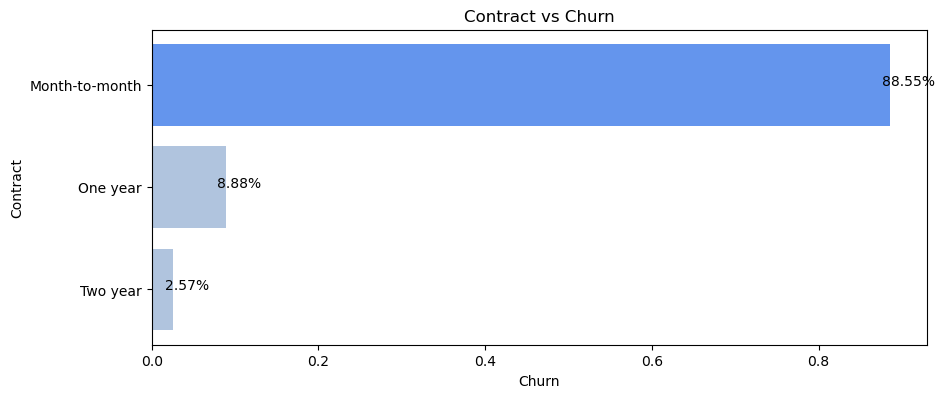

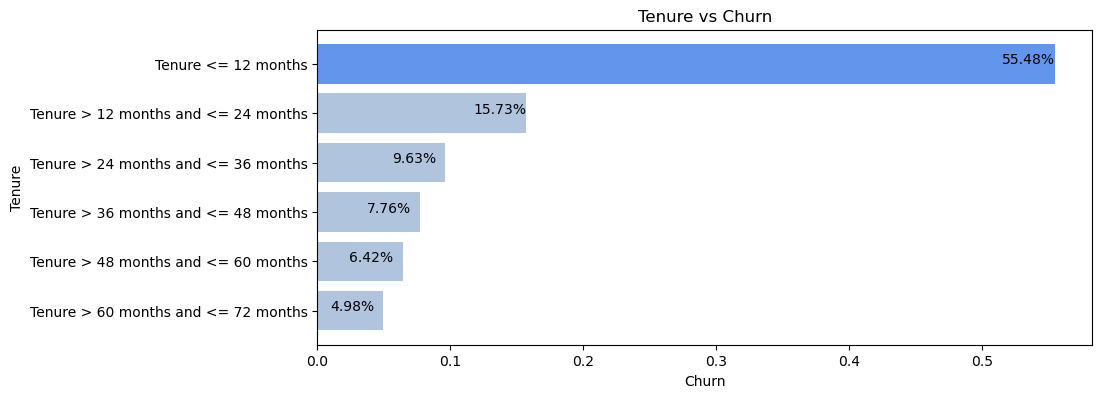

In [28]:
# Analysis Contract and Tenure vs Churn


# Analysis Contract vs Churn

# We replace the categorical data found within the "Contract" column, which are "Month-to-month","Two year" and "One year" with 0, 1 and 2.
df_churn['Contract'].replace('Month-to-month', 0, inplace = True)
df_churn['Contract'].replace('Two year', 1, inplace = True)
df_churn['Contract'].replace('One year', 2, inplace = True)

# Contract = 0 and Churn = 1
contract_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Contract'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])

# Contract = 1 and Churn = 1
contract_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Contract'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

# Contract = 2 and Churn = 1
contract_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Contract'] == 2)]) / len(df_churn[df_churn['Churn'] == 1])



# Analysis Tenure vs Churn

# Tenure <= 12 months, Churn = 1
tenure1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['tenure'] <= 12)]) / len(df_churn[df_churn['Churn'] == 1])

# Tenure > 12 months and <= 24 months, Churn = 1
tenure2 = len(df_churn[(df_churn['Churn'] == 1) & (12 < df_churn['tenure']) & (df_churn['tenure'] <= 24)]) / len(df_churn[df_churn['Churn'] == 1])

# Tenure > 24 months and <= 36 months, Churn = 1
tenure3 = len(df_churn[(df_churn['Churn'] == 1) & (24 < df_churn['tenure']) & (df_churn['tenure'] <= 36)]) / len(df_churn[df_churn['Churn'] == 1])

# Tenure > 36 months and <= 48 months, Churn = 1
tenure4 = len(df_churn[(df_churn['Churn'] == 1) & (36 < df_churn['tenure']) & (df_churn['tenure'] <= 48)]) / len(df_churn[df_churn['Churn'] == 1])

# Tenure > 48 months and <= 60 months, Churn = 1
tenure5 = len(df_churn[(df_churn['Churn'] == 1) & (48 < df_churn['tenure']) & (df_churn['tenure'] <= 60)]) / len(df_churn[df_churn['Churn'] == 1])

# Tenure > 60 months and <= 72 months, Churn = 1
tenure6 = len(df_churn[(df_churn['Churn'] == 1) & (60 < df_churn['tenure']) & (df_churn['tenure'] <= 72)]) / len(df_churn[df_churn['Churn'] == 1])


# Grafic Contract vs Churn
colors = ['lightsteelblue','lightsteelblue', 'cornflowerblue']
labels = ['Month-to-month', 'Two year', 'One year']
values = [contract_0, contract_1, contract_2 ]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 9))
plt.subplot(2, 1, 2)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.01, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Contract vs Churn')
plt.xlabel('Churn')
plt.ylabel('Contract')


# Grafic Tenure vs Churn
colors = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'cornflowerblue']
labels = ['Tenure <= 12 months', 'Tenure > 12 months and <= 24 months', 'Tenure > 24 months and <= 36 months', 
          'Tenure > 36 months and <= 48 months', 'Tenure > 48 months and <= 60 months', 'Tenure > 60 months and <= 72 months']
values = [tenure1, tenure2, tenure3, tenure4, tenure5, tenure6]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 9))
plt.subplot(2, 1, 2)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.040, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.show()

What is the probability that a customer has a tenure of less than or equal to 24 months with a mean of 14 and a standard deviation of 16 and is among the customers that have churn and a type of contract Month-to-month?

The std: 16
The mean: 14

The probability is: 73.59%


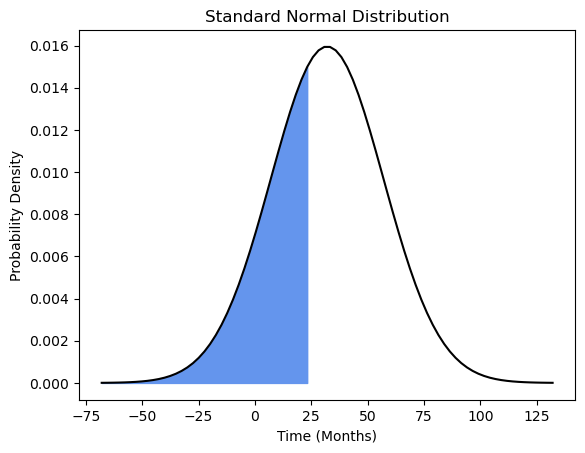

In [29]:
# Probability
std = df_churn[df_churn['Churn'] == 1][df_churn['Contract'] == 0]['tenure'].std()
mean = df_churn[df_churn['Churn'] == 1][df_churn['Contract'] == 0]['tenure'].mean()
x = 24

print("The std: {:.0f}".format(std))
print("The mean: {:.0f}".format(mean))

z = (x - mean) / std
probability = norm.cdf(z)

print("\nThe probability is: {:.2%}".format(probability))

mean = 32
std = 25
x = np.linspace(mean - 4*std, mean + 4*std, 80)
y = stats.norm.pdf(x, mean, std)

plt.plot(x, y, color='black')
plt.fill_between(x, y, where = (x <= 24), color='cornflowerblue')
plt.title('Standard Normal Distribution')
plt.xlabel('Time (Months)')
plt.ylabel('Probability Density')
plt.show()

### Analysis Paperless Billing and Payment Method vs Churn


Analyzing the Electronic Billing and Payment Method variables, we can observe that the payment method through Electronic Check presents problems both for customers who have Electronic Billing and for those who do not.

Therefore, we can identify that the payment service through Electronic Check should be reviewed, since it may have service problems, duplicate billing problems or other types of problems that must be identified.

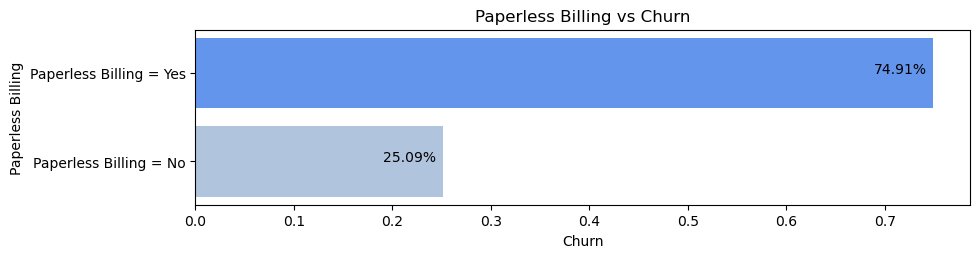

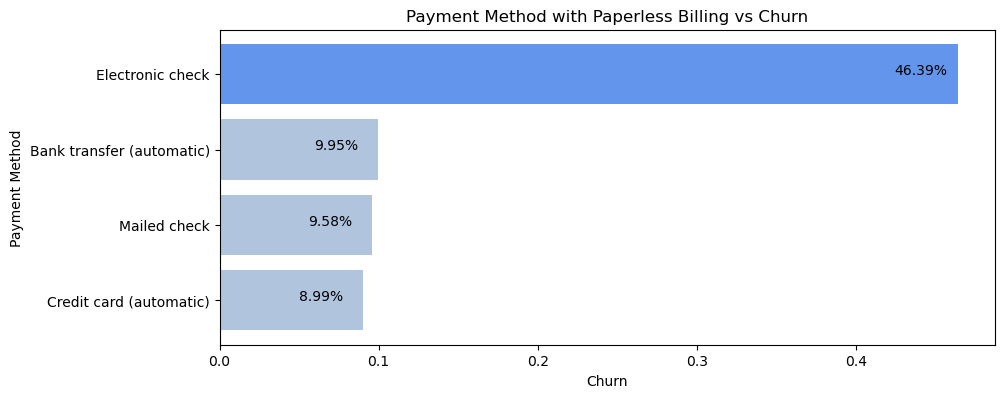

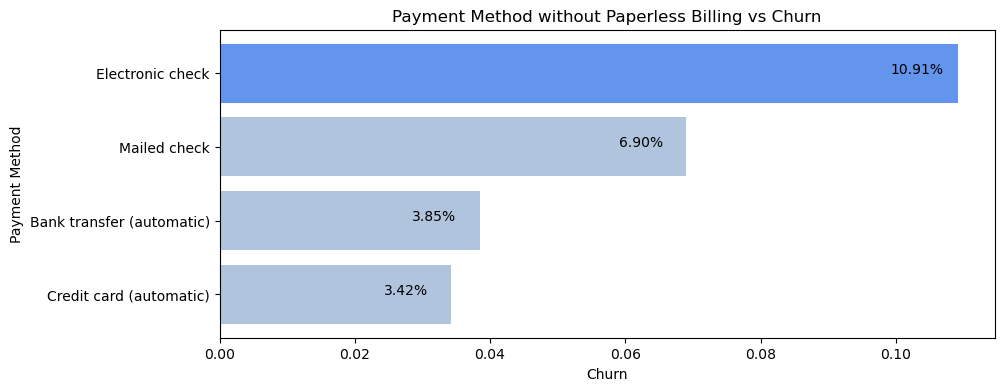

In [30]:
# Analysis Paperless Billing and Payment Method vs Churn

# Analysis Paperless Billing vs Churn

# We replace the categorical data in the "PaperlessBilling", "No" and "Yes" columns with 0 and 1
df_churn['PaperlessBilling'].replace('No', 0, inplace = True)
df_churn['PaperlessBilling'].replace('Yes', 1, inplace = True)

# PaperlessBilling = 1 and Churn = 1
paperless_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaperlessBilling'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

# PaperlessBilling = 0 and Churn = 1
paperless_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaperlessBilling'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])


# Analysis Payment Method with Paperless Billing vs Churn

# We replace the categorical data in the "PaymentMethod", "No" and "Yes" columns with 0 and 1
df_churn['PaymentMethod'].replace('Electronic check', 0, inplace = True)
df_churn['PaymentMethod'].replace('Mailed check', 1, inplace = True)
df_churn['PaymentMethod'].replace('Bank transfer (automatic)', 2, inplace = True)
df_churn['PaymentMethod'].replace('Credit card (automatic)', 3, inplace = True)


# PaymentMethod = 0 and Churn = 1
paymentmethod_0 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 0) & (df_churn['PaperlessBilling'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

# PaymentMethod = 1 and Churn = 1
paymentmethod_1 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 1) & (df_churn['PaperlessBilling'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

# PaymentMethod = 2 and Churn = 1
paymentmethod_2 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 2) & (df_churn['PaperlessBilling'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])

# PaymentMethod = 3 and Churn = 1
paymentmethod_3 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 3) & (df_churn['PaperlessBilling'] == 1)]) / len(df_churn[df_churn['Churn'] == 1])


# Analysis Payment Method without Paperless Billing vs Churn

# PaymentMethod = 0 and Churn = 1
paymentmethod_4 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 0) & (df_churn['PaperlessBilling'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])

# PaymentMethod = 1 and Churn = 1
paymentmethod_5 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 1) & (df_churn['PaperlessBilling'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])

# PaymentMethod = 2 and Churn = 1
paymentmethod_6 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 2) & (df_churn['PaperlessBilling'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])

# PaymentMethod = 3 and Churn = 1
paymentmethod_7 = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['PaymentMethod'] == 3) & (df_churn['PaperlessBilling'] == 0)]) / len(df_churn[df_churn['Churn'] == 1])


# Grafic Paperless Billing vs Churn
colors = ['lightsteelblue','cornflowerblue']
labels = ['Paperless Billing = Yes', 'Paperless Billing = No']
values = [paperless_1, paperless_0]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.060, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Paperless Billing vs Churn')
plt.xlabel('Churn')
plt.ylabel('Paperless Billing')

# Grafic Payment Method with PaperLess Billing vs Churn
colors = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'cornflowerblue']
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
values = [paymentmethod_0, paymentmethod_1, paymentmethod_2, paymentmethod_3]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 9))
plt.subplot(2, 1, 2)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.040, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Payment Method with Paperless Billing vs Churn')
plt.xlabel('Churn')
plt.ylabel('Payment Method')


# Grafic Payment Method without PaperLess Billing vs Churn
colors = ['lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'cornflowerblue']
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
values = [paymentmethod_4, paymentmethod_5, paymentmethod_6, paymentmethod_7]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.subplot(1, 1, 1)
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.010, index - 0, f'{value:.2%}', fontsize = 10, color ='black', weight = '0')
plt.title('Payment Method without Paperless Billing vs Churn')
plt.xlabel('Churn')
plt.ylabel('Payment Method')

plt.show()

### Analysis Monthly Charges vs Churn

When analyzing the 'MonthlyCharges' column, we can realize something important that we had not seen before, and this is that the Phone Service is associated with the Fiber Optic Internet Service.


This means that if the customers does not have Phone Service and wants Internet Service, the only possible option is DSL Internet Service. On the other hand, if the customer has Phone Service, they can choose between DSL or Fiber Optic.

We can also see that the total monthly amount that the company loses due to critical services that we were able to previously detected in the analysis of the variables is €68,282, this is equivalent to 49% of the total monthly loss due to Churn.

The following graph shows the critical services that were all analyzed on a Churn and Contract Month-to-month basis:

The Company is losing a Total Monthly amount in Churn of: 139131

Churn + Contract Month-to-month + Phone Service + Fiber Optic + Electronic Check: 68282
Churn + Contract Month-to-month + Phone Service + DSL + Electronic Check: 5597

Churn + Contract Month-to-month + No Phone Service + DSL + Electronic Check: 3180
Churn + Contract Month-to-month + No Phone Service +  Fiber Optic + Electronic Check: 0


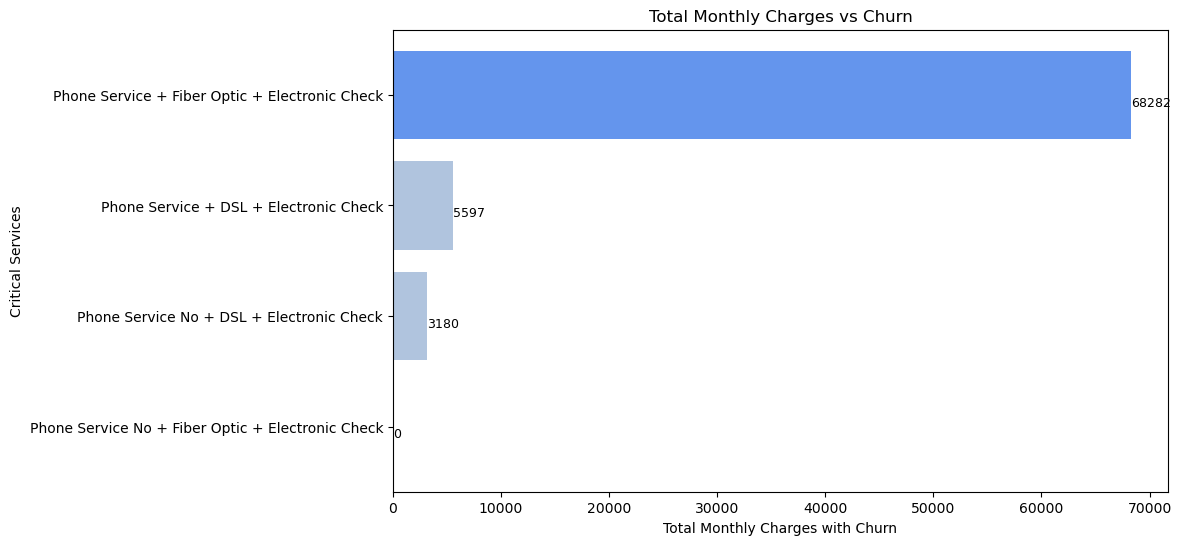

In [31]:
# Analysis Monthly Charges vs Churn


# Total Monthly Charge with Churn
total_monthly_charges = df_churn[df_churn['Churn'] == 1]['MonthlyCharges'].sum()
print("The Company is losing a Total Monthly amount in Churn of: {:.0f}".format(total_monthly_charges))


# Churn = Yes, Contract = Month-to-month, Phone Service = Yes, Fiber Optic Internet Service, Payment Method = Electronic Check
monthly_charges1 = df_churn[df_churn['Churn'] == 1][df_churn['Contract'] == 0][df_churn['PhoneService'] == 1][df_churn['InternetService'] == 2][df_churn['PaymentMethod'] == 0]['MonthlyCharges'].sum()
print("\nChurn + Contract Month-to-month + Phone Service + Fiber Optic + Electronic Check: {:.0f}".format(monthly_charges1))


# Churn = Yes, Contract = Month-to-month, Phone Service = Yes, DSL Internet Service, Payment Method = Electronic Check
monthly_charges2 = df_churn[df_churn['Churn'] == 1][df_churn['Contract'] == 0][df_churn['PhoneService'] == 1][df_churn['InternetService'] == 1][df_churn['PaymentMethod'] == 0]['MonthlyCharges'].sum()
print("Churn + Contract Month-to-month + Phone Service + DSL + Electronic Check: {:.0f}".format(monthly_charges2))


# Churn = Yes, Contract = Month-to-month, Phone Service = No, DSL Internet Service, Payment Method = Electronic Check
monthly_charges3 = df_churn[df_churn['Churn'] == 1][df_churn['Contract'] == 0][df_churn['PhoneService'] == 0][df_churn['InternetService'] == 1][df_churn['PaymentMethod'] == 0]['MonthlyCharges'].sum()
print("\nChurn + Contract Month-to-month + No Phone Service + DSL + Electronic Check: {:.0f}".format(monthly_charges3))


# Churn = Yes, Contract = Month-to-month, Phone Service = No,  Fiber Optic Internet Service, Payment Method = Electronic Check
monthly_charges4 = df_churn[df_churn['Churn'] == 1][df_churn['Contract'] == 0][df_churn['PhoneService'] == 0][df_churn['InternetService'] == 2][df_churn['PaymentMethod'] == 0]['MonthlyCharges'].sum()
print("Churn + Contract Month-to-month + No Phone Service +  Fiber Optic + Electronic Check: {:.0f}".format(monthly_charges4))


# Grafic Total Monthly Charges vs Churn
colors = ['lightsteelblue','lightsteelblue','lightsteelblue','cornflowerblue']
labels = ['Phone Service + Fiber Optic + Electronic Check', 
          'Phone Service + DSL + Electronic Check', 
          'Phone Service No + DSL + Electronic Check',
          'Phone Service No + Fiber Optic + Electronic Check']
values = [monthly_charges1, monthly_charges2, monthly_charges3, monthly_charges4]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 6))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.0010, index - 0.1, f'{value:.0f}', fontsize = 9, color ='black', weight = '0')
plt.title('Total Monthly Charges vs Churn')
plt.xlabel('Total Monthly Charges with Churn')
plt.ylabel('Critical Services')

plt.show()

In [32]:
# Probability 

# Probability that a customer does not have Phone Service and has Fiber Optic Internet Service
probability1 = len(df_churn[(df_churn['PhoneService'] == 0) & (df_churn['InternetService'] == 2)]) / len(df_churn['Churn'])
print("The probability that a customer does not have Phone Service and has Fiber Optic Internet Service: {:.2%}".format(probability1))


# Probability that a customer does not have Phone Service and has DSL Internet Service
probability2 = len(df_churn[(df_churn['PhoneService'] == 0) & (df_churn['InternetService'] == 1)]) / len(df_churn['Churn'])
print("The probability that a customer does not have Phone Service and has DSL Internet Service: {:.2%}".format(probability2))


# Probability that a customer has Phone Service and Fiber Optic Internet Service
probability3 = len(df_churn[(df_churn['PhoneService'] == 1) & (df_churn['InternetService'] == 2)]) / len(df_churn['Churn'])
print("The probability that a customer has Phone Service and Fiber Optic Internet Service: {:.2%}".format(probability3))


# Probability that a customer has Phone Service and DSL Internet Service
probability3 = len(df_churn[(df_churn['PhoneService'] == 1) & (df_churn['InternetService'] == 1)]) / len(df_churn['Churn'])
print("The probability that a customer has Phone Service and DSL Internet Service: {:.2%}".format(probability3))

The probability that a customer does not have Phone Service and has Fiber Optic Internet Service: 0.00%
The probability that a customer does not have Phone Service and has DSL Internet Service: 9.68%
The probability that a customer has Phone Service and Fiber Optic Internet Service: 43.96%
The probability that a customer has Phone Service and DSL Internet Service: 24.69%


What would be the probability that a client is inside the Churn, has a month-to-month contract, has Phone Service, has Fiber Optic Internet Service and has an Electronic Check payment method?

In [33]:
# Probability
probabilityx = len(df_churn[(df_churn['Churn'] == 1) & (df_churn['Contract'] == 0) & (df_churn['PhoneService'] == 1) & (df_churn['InternetService'] == 2) & (df_churn['PaymentMethod'] == 0)  ]) / len(df_churn['Churn'])
print("The probability is: {:.2%}".format(probabilityx))

The probability is: 11.20%


# Observations 

After the initial analysis, we were able to observe the structure of the data, we were able to identify the diagram of the products that the company contains and we were able to identify critical variables that could be affecting the Churn and consequently the company's income.

In our opinion, as a Business Data Analytics, the analysis and previous observation of the data are essential to understand the data, understand the business and identify the objective we seek.

Now we are going to clean the data, normalize the data and review the correlations of the data to apply the Machine Learning models later and find the best model that fits our objectives.

## Data Cleaning and Normalization

The "df_churn.dtypes" syntax shows us the data type of each column in our Data Frame called "df_churn".

Data types can be numeric (int, float), date/time (datetime), string (object), boolean (bool), among others.

By checking the data types of our columns, we can ensure that the data is being read and processed correctly before doing any further analysis.

It is also useful for checking if a data type conversion is necessary to ensure that the columns have the correct type for the analysis to be performed.

In [34]:
df_churn.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup         object
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

We will remove the "customerID" column as it is not necessary for our analysis.

In [35]:
df_churn.drop(['customerID'], axis=1, inplace = True)

In [36]:
df_churn.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup         object
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

We use the "df_churn.isna().sum()" syntax to count the number of missing values (null values) in each column of our Data Frame named "df_churn".

"df_churn.isna()" returns a Data Frame with the same indices and columns as "df_churn", but with boolean values indicating whether each cell is null or not. Then sum() is applied along the 0-axis (that is, vertically, across each column) to count the number of null values in each column.

As we can see here, null values do not appear inside our Data Frame, but there is a catch, since we have columns of type "object", it is important to note that columns of type "object" can contain missing values that Pandas does not recognize as missing, such as blank values or empty strings.

In this case, the syntax may not count these values as missing and produce incorrect results. To correctly handle missing values in columns of type "object", it is necessary to check and replace the missing values as blank values or empty strings.

In [37]:
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


The following syntax works to replace all values in our "df_churn" Data Frame that are in the list ["n.a.","?","NA","n/a", "na", "--" , " " ] to np.nan, which is the value typically used to represent a missing value in Python.

This is useful in data preprocessing as it is common for data to have missing values or missing data that is represented in different ways. By replacing them with a single value (np.nan), methods can be applied to handle these missing values uniformly.

In [38]:
df_churn.replace(["n.a.","?","NA","n/a", "na", "--", " "], np.nan, inplace = True)
df_churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,2,0,2,0,0,0,2,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,2,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,2,0,2,2,0,0,2,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,1,0,0,0,8,1,1,2,0,0,2,0,2,2,0,1,0,99.65,820.5,1
6,0,0,0,1,22,1,1,2,0,1,0,0,2,0,0,1,3,89.10,1949.4,0
7,1,0,0,0,10,0,2,1,2,0,0,0,0,0,0,0,1,29.75,301.9,0
8,1,0,1,0,28,1,1,2,0,0,2,2,2,2,0,1,0,104.80,3046.05,1
9,0,0,0,1,62,1,0,1,2,1,0,0,0,0,2,0,2,56.15,3487.95,0


Now we can see that we do indeed have null values in the "TotalCharges" column, but it is not correctly accounting for NaN values in columns of type "object" because Pandas's "isna()" function does not consider np.nan values in columns of type "object" as missing values. Therefore, if there are np.nan values in these columns, "isna()" will not identify them as null.

Instead, we can use the "isnull()" function to check if a value is null or not. But our intention later is to be able to replace all the columns to "int"

In [39]:
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


By changing the type of the "object" variable to write "Int" of the "OnlineBackup" column, we can now display null values.

In [40]:
# Convert column "OnlineBackup" to integer
df_churn['OnlineBackup'] = pd.to_numeric(df_churn['OnlineBackup'], errors='coerce').astype('Int32')

In [41]:
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup        1526
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64


Here we can identify the null values that are a total of 1526.

In [42]:
df_churn['OnlineBackup'].value_counts(dropna=False)

0       3088
1       2429
<NA>    1526
Name: OnlineBackup, dtype: Int64

What we will do next is replace the "NaN" values with 0 and 1. As this variable is not among the critical variables in our previous analysis, we will replace 79% of the "NaN" values with 1 and 21% we will replace them with values 0. We will do this so that both the values 0 and 1 are more balanced.

In [43]:
# Calculate the number of null values to be replaced with 1
num_nulls = df_churn['OnlineBackup'].isnull().sum()
num_replace_1 = round(0.79 * num_nulls)

# Fill null values with 1 and the rest with 0
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].fillna(1, limit=num_replace_1)
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].fillna(0)

In [44]:
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [45]:
df_churn['OnlineBackup'].value_counts(dropna=False)

1       3955
0       3088
<NA>       0
Name: OnlineBackup, dtype: Int64

In the following syntax, what we are doing is replacing the null values of the "TotalCharges" column with the multiplication between the "tenure" column and the "MonthlyCharges" column.

And later we will be checking that indeed we no longer have null values in our Data Frame.

In [46]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(df_churn['tenure'] * df_churn['MonthlyCharges'])

In [47]:
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [48]:
df_churn.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          Int32
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

After removing all null values from the columns we will replace the "int" and "object" data types with "float".

In general, data in "float" format is more suitable for Machine Learning analysis than data in "int" format. 

The reason is that data in "float" format allows the use of continuous values, which is especially useful for algorithms that involve distance computation, such as k-means and hierarchical clustering. In addition, data in "float" format also allows the use of fractional values, which can improve the accuracy of some algorithms.

In [49]:
df_churn = df_churn.astype(float)

In [50]:
df_churn.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

## Correlation is not causation

Now we will see the correlation that the variables have between them.

Seeing the correlation of the variables is an important part but you have to remember that correlation is not causation.

Correlation measures the degree of linear relationship between two variables, that is, how one variable varies in relation to the other. However, there are many situations in which two variables may be correlated, but there is no causal relationship between them.

Therefore, it is important to note that although correlation can indicate a relationship between variables, it is not enough to establish a causal relationship between them. It is necessary to carry out more in-depth studies and analyze other factors that may influence the variables to determine if there is a causal relationship between them.

From what has been said above, we highlight the importance of understanding the business, understanding our data and having identified our objective in order to be able to analyze, in this case, the correlations correctly.

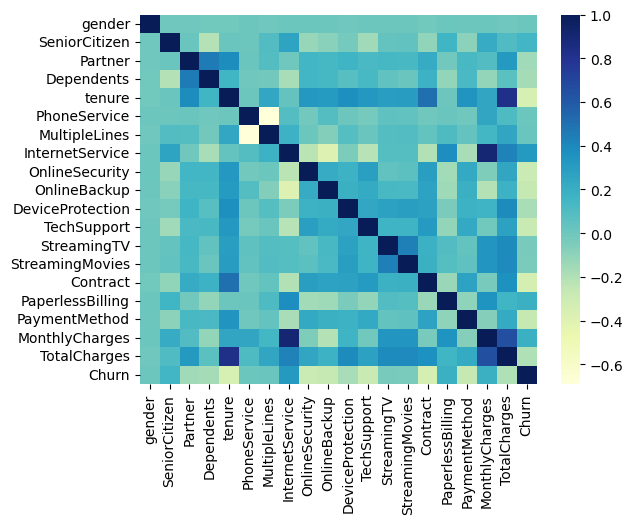

In [51]:
corr_matrix = df_churn.corr()

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [52]:
corr_matrix = df_churn.corr()

print(corr_matrix)

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000       0.001874  0.001808   -0.010517 -0.005112   
SeniorCitizen     0.001874       1.000000  0.016479   -0.211185  0.016540   
Partner           0.001808       0.016479  1.000000    0.452676  0.379771   
Dependents       -0.010517      -0.211185  0.452676    1.000000  0.159823   
tenure           -0.005112       0.016540  0.379771    0.159823  1.000000   
PhoneService      0.006488       0.008576  0.017706   -0.001762  0.008431   
MultipleLines     0.000485       0.099883  0.090981   -0.016875  0.242309   
InternetService   0.010380       0.259390 -0.000132   -0.179631  0.033170   
OnlineSecurity    0.015017      -0.128221  0.150828    0.152166  0.325530   
OnlineBackup      0.008191      -0.087952  0.136058    0.138756  0.312764   
DeviceProtection -0.000549      -0.021398  0.166330    0.080537  0.371163   
TechSupport       0.006825      -0.151268  0.126733    0.133524  0.323003   

Looking at the correlations we can see that the "Churn" column has a correlation greater than 0.3 with the "InternetService" column, but there is a problem, we don't know with which Internet Service it has the highest correlation.

In addition, we can see that it has a negative correlation greater than 0.3 with the "tenure" and "Contract" columns, but we also have a problem, we don't know which services within the "tenure" and "Contract" columns it has a higher negative correlation.

Another thing that we must observe is that Churn has a negative correlation with the "PaymentMethod" column of -0.26, in the previous analysis we could observe the "PaymentMethod" with the highest Churn was with "Electronic Check", which we cannot observe here.

Therefore we cannot accurately identify the correlations we want to identify for the critical variables seen in our initial analyses.

In this case, what we must do is separate the columns with the critical variables previously identified ("InternetService", "PaymentMethod" and "Contract", "PhoneService") to have a more exact correlation and thus be able to verify if the previous analysis could identify our critical variables of the correct way.

Next, we will separate the variables described above.

In [53]:
# Create dummy variables for the "InternetService" column
internet_service_dummies = pd.get_dummies(df_churn["InternetService"], prefix="InternetService")

In [54]:
internet_service_dummies.head()

,InternetService_0.0,InternetService_1.0,InternetService_2.0
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [55]:
# Select the resulting columns
with_out_internet_service = internet_service_dummies["InternetService_0.0"]
internet_service_dsl = internet_service_dummies["InternetService_1.0"]
internet_service_fiber_optic = internet_service_dummies["InternetService_2.0"]

In [56]:
# Concatenates the resulting columns into a our data frame
df_churn = pd.concat([df_churn, with_out_internet_service, internet_service_dsl, internet_service_fiber_optic], axis=1)

In [57]:
# Delete the original column "InternetService"
df_churn = df_churn.drop(columns=["InternetService"])

In [58]:
# Rename columns
df_churn = df_churn.rename(columns={
    "InternetService_0.0": "WithOut Internet Service",
    "InternetService_1.0": "Internet Service DSL",
    "InternetService_2.0": "Internet Service Fiber Optic"
})

In [59]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,WithOut Internet Service,Internet Service DSL,Internet Service Fiber Optic
0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,29.85,29.85,0.0,0,1,0
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,2.0,0.0,2.0,...,0.0,2.0,0.0,1.0,56.95,1889.50,0.0,0,1,0
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,53.85,108.15,1.0,0,1,0
3,0.0,0.0,0.0,0.0,45.0,0.0,2.0,2.0,0.0,2.0,...,0.0,2.0,0.0,2.0,42.30,1840.75,0.0,0,1,0
4,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,70.70,151.65,1.0,0,0,1


In [60]:
# Create dummy variables for the "PaymentMethod" column
payment_method_dummies = pd.get_dummies(df_churn["PaymentMethod"], prefix ="PaymentMethod")

In [61]:
payment_method_dummies.head()

,PaymentMethod_0.0,PaymentMethod_1.0,PaymentMethod_2.0,PaymentMethod_3.0
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0


In [62]:
# Select the resulting columns
electronic_check = payment_method_dummies["PaymentMethod_0.0"]
mailed_check = payment_method_dummies["PaymentMethod_1.0"]
bank_transfer_automatic = payment_method_dummies["PaymentMethod_2.0"]
credit_card_automatic = payment_method_dummies["PaymentMethod_3.0"]

In [63]:
# Concatenates the resulting columns into a our data frame
df_churn = pd.concat([df_churn, electronic_check, mailed_check, bank_transfer_automatic, credit_card_automatic ], axis=1)

In [64]:
# Delete the original column "PaymentMethod"
df_churn = df_churn.drop(columns=["PaymentMethod"])

In [65]:
# Rename columns
df_churn = df_churn.rename(columns={
    "PaymentMethod_0.0": "Electronic check",
    "PaymentMethod_1.0": "Mailed check",
    "PaymentMethod_2.0": "Bank transfer (automatic)",
    "PaymentMethod_3.0": "Credit card (automatic)"
})

In [66]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,WithOut Internet Service,Internet Service DSL,Internet Service Fiber Optic,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,...,29.85,29.85,0.0,0,1,0,1,0,0,0
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,2.0,0.0,2.0,...,56.95,1889.50,0.0,0,1,0,0,1,0,0
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,...,53.85,108.15,1.0,0,1,0,0,1,0,0
3,0.0,0.0,0.0,0.0,45.0,0.0,2.0,2.0,0.0,2.0,...,42.30,1840.75,0.0,0,1,0,0,0,1,0
4,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,70.70,151.65,1.0,0,0,1,1,0,0,0


In [67]:
# Create dummy variables for the "Contract" column
contract_dummies = pd.get_dummies(df_churn["Contract"], prefix ="Contract")

In [68]:
contract_dummies.head()

,Contract_0.0,Contract_1.0,Contract_2.0
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [69]:
# Select the resulting columns
month_to_month = contract_dummies["Contract_0.0"]
two_year = contract_dummies["Contract_1.0"]
one_year = contract_dummies["Contract_2.0"]

In [70]:
# Concatenates the resulting columns into a our data frame
df_churn = pd.concat([df_churn, month_to_month, two_year, one_year], axis=1)

In [71]:
# Delete the original column "Contract"
df_churn = df_churn.drop(columns=["Contract"])

In [72]:
# Rename columns
df_churn = df_churn.rename(columns={
    "Contract_0.0": "Contract Month-to-Month",
    "Contract_1.0": "Contract Two Years",
    "Contract_2.0": "Contract One Year"
})

In [73]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,WithOut Internet Service,Internet Service DSL,Internet Service Fiber Optic,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),Contract Month-to-Month,Contract Two Years,Contract One Year
0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0,1,0,1,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,2.0,0.0,2.0,...,0,1,0,0,1,0,0,0,0,1
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0
3,0.0,0.0,0.0,0.0,45.0,0.0,2.0,2.0,0.0,2.0,...,0,1,0,0,0,1,0,0,0,1
4,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0


In [74]:
# Create dummy variables for the "PhoneService" column
phone_service_dummies = pd.get_dummies(df_churn["PhoneService"], prefix ="PhoneService")

In [75]:
phone_service_dummies.head()

,PhoneService_0.0,PhoneService_1.0
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [76]:
# Select the resulting columns
phone_service_no = phone_service_dummies["PhoneService_0.0"]
phone_service_yes = phone_service_dummies["PhoneService_1.0"]

In [77]:
# Concatenates the resulting columns into a our data frame
df_churn = pd.concat([df_churn, phone_service_no, phone_service_yes], axis=1)

In [78]:
# Delete the original column "Contract"
df_churn = df_churn.drop(columns=["PhoneService"])

In [79]:
# Rename columns
df_churn = df_churn.rename(columns={
    "PhoneService_0.0": "Phone Service No",
    "PhoneService_1.0": "Phone Service Yes"
})

In [80]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Internet Service Fiber Optic,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),Contract Month-to-Month,Contract Two Years,Contract One Year,Phone Service No,Phone Service Yes
0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,0.0,34.0,0.0,2.0,0.0,2.0,0.0,...,0,0,1,0,0,0,0,1,0,1
2,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,0.0,0.0,0.0,45.0,2.0,2.0,0.0,2.0,2.0,...,0,0,0,1,0,0,0,1,1,0
4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,0,0,1


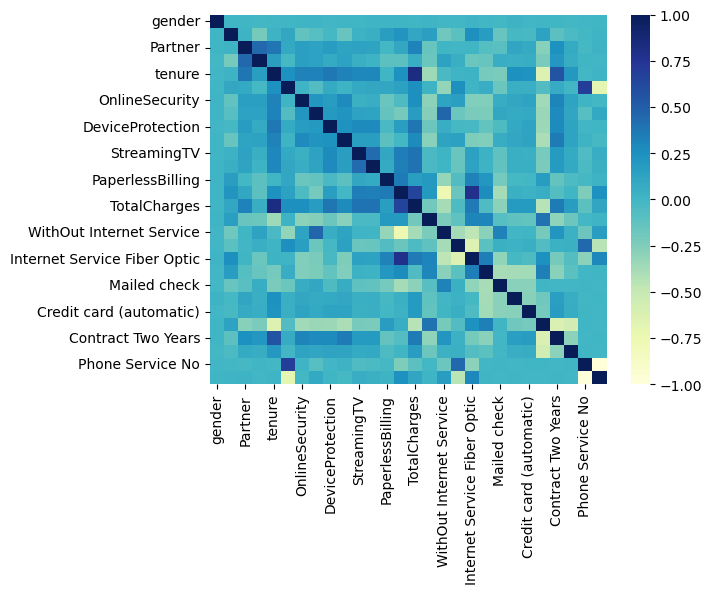

In [81]:
corr_matrix = df_churn.corr()

# Grafic
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [82]:
corr_matrix = df_churn.corr()

print(corr_matrix)

                                gender  SeniorCitizen   Partner  Dependents  \
gender                        1.000000       0.001874  0.001808   -0.010517   
SeniorCitizen                 0.001874       1.000000  0.016479   -0.211185   
Partner                       0.001808       0.016479  1.000000    0.452676   
Dependents                   -0.010517      -0.211185  0.452676    1.000000   
tenure                       -0.005112       0.016540  0.379771    0.159823   
MultipleLines                 0.000485       0.099883  0.090981   -0.016875   
OnlineSecurity                0.015017      -0.128221  0.150828    0.152166   
OnlineBackup                  0.008191      -0.087952  0.136058    0.138756   
DeviceProtection             -0.000549      -0.021398  0.166330    0.080537   
TechSupport                   0.006825      -0.151268  0.126733    0.133524   
StreamingTV                   0.006421       0.030776  0.137341    0.046885   
StreamingMovies               0.008743       0.04726

In [83]:
corr_matrix = df_churn.corr()
print(corr_matrix['Churn'])

gender                          0.008612
SeniorCitizen                   0.150889
Partner                        -0.150448
Dependents                     -0.164221
tenure                         -0.352296
MultipleLines                   0.019423
OnlineSecurity                 -0.289309
OnlineBackup                   -0.268005
DeviceProtection               -0.178134
TechSupport                    -0.282492
StreamingTV                    -0.036581
StreamingMovies                -0.038492
PaperlessBilling                0.191825
MonthlyCharges                  0.193356
TotalCharges                   -0.198347
Churn                           1.000000
WithOut Internet Service       -0.227890
Internet Service DSL           -0.124214
Internet Service Fiber Optic    0.308020
Electronic check                0.301919
Mailed check                   -0.091683
Bank transfer (automatic)      -0.117937
Credit card (automatic)        -0.134302
Contract Month-to-Month         0.405103
Contract Two Yea

Having separated our columns described above, we can now see that the correlation with the critical variables identified in our initial analysis is more accurate and we can better describe the correlation.

In [84]:
corr_matrix = df_churn[["Churn", "Internet Service Fiber Optic","Internet Service DSL", "Phone Service Yes", 
                        "Phone Service No","Electronic check", "Contract Month-to-Month","Contract Two Years", 
                        "tenure"]].corr().abs()

# Rounds the values in the correlation matrix to two decimal places
corr_matrix = corr_matrix.round(3)

# Select variables with a correlation greater than 0.3
high_corr_vars = np.where(corr_matrix > 0.3)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(* high_corr_vars) if x != y and x < y]

# Order the pairs of variables with the highest correlation from lowest to highest.
sorted_pairs = sorted(high_corr_pairs, key = lambda x: corr_matrix.loc[x[0], x[1]], reverse = False)

for pair in sorted_pairs:
    print("{} - {}: {}".format(pair[0], pair[1], corr_matrix.loc[pair[0], pair[1]]))

Churn - Electronic check: 0.302
Churn - Contract Two Years: 0.302
Churn - Internet Service Fiber Optic: 0.308
Electronic check - Contract Month-to-Month: 0.332
Internet Service Fiber Optic - Electronic check: 0.336
Churn - tenure: 0.352
Churn - Contract Month-to-Month: 0.405
Internet Service DSL - Phone Service Yes: 0.452
Internet Service DSL - Phone Service No: 0.452
Contract Two Years - tenure: 0.559
Contract Month-to-Month - Contract Two Years: 0.623
Internet Service Fiber Optic - Internet Service DSL: 0.641
Contract Month-to-Month - tenure: 0.646
Phone Service Yes - Phone Service No: 1.0


## Important Observation of the Correlation

First of all, it is important to keep in mind that correlation by itself does not indicate causation and that it is always necessary to analyze the context and the variables involved to make an adequate interpretation of the results.

On the other hand, there is no general rule about when a correlation is considered as high, since this may depend on the context and the variables that we are analyzing. However, in general terms, it could be said that a correlation above 0.7 or below -0.7 can be considered as high.

However, in our previous analysis, we were able to identify that the Churn percentage within the company is only 26.54%, so it is not very high, therefore we take a correlation above 0.3 or below -0.3 as a correlation high.

Based on the correlations presented, we can identify the following:

.- The positive correlation of 0.30 of the Churn with Electronic Check. This suggests that customers who pay via electronic check are more likely to leave the business. Therefore, it can be recommended to promote other payment methods, such as credit cards, debit cards or online payments, to decrease the probability of Churn.


.- Churn's -0.35 negative correlation with Tenure, indicates that customers who have been with the company longer are less likely to leave. Therefore, it can be recommended to encourage long-term customer loyalty, by offering discounts, special promotions and loyalty programs.


.- Another important positive correlation is 0.40 Churn with Contract Month-to-Month. This suggests that customers who have monthly contracts are more likely to leave the company. It may be recommended to promote long-term contracts, such as two-year contracts, to incentivize loyalty and reduce the chance of Churn.


.- The 0.31 positive correlation between Churn and Internet Service Fiber Optic suggests that customers with this service are more likely to leave the company. It can be recommended to improve the quality and speed of the Internet service with Fiber Optic, to reduce the probability of Churn.


.- The positive correlation between Internet Service (DSL) and Phone Service (Yes) suggests that customers who have both services are more likely to stay with the company. Therefore, it may be recommended to cross-sell services that include both Internet Service DSL and Phone Service.


.- The negative correlation of -0.62 between Contract Month-to-Month and Contract Two Years suggests that customers who have monthly contracts are less likely to contract two-year contracts. It may be recommended to offer special incentives for customers who contract two-year contracts, such as discounts and special promotions. In addition to this, customers who have two-year contracts are less likely to leave the company.


We must also highlight that a peculiarity was found within our Data Frame, in particular with the variable Phone Service and the Internet Service with Fiber Optic, this peculiarity shows us that if the client wants to obtain the Internet service with Fiber Optic, he must necessarily have the service of Phone Service. This peculiarity is not observed in the correlation but it is extremely important since the Internet service with Fiber Optic has a high relationship with Churn.


It should be noted that without prior analysis and following the CRISP-DM modelling, it would have been impossible to find these peculiarities within our Data Frame.


Therefore, it is extremely important to follow the CRISP-DM model, which tells us:

1.- Business Understanding.

2.- Data Understanding.

3.- Data Preparation.

4.- Modeling.

5.- Evaluation.

6.- Deployment.

# Modeling

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot

## .- Applying the models with 10% test and 90% training

In [86]:
from sklearn.model_selection import train_test_split

X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(6338, 27) (705, 27) (6338,) (705,)


In [87]:
y_train.value_counts()

0.0    4641
1.0    1697
Name: Churn, dtype: int64

In [88]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [89]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.737293 (0.023564)
SVM: 0.771542 (0.011286)
KNN: 0.765383 (0.014821)
RFC: 0.788892 (0.017226)
CART: 0.730675 (0.020778)
LR: 0.803088 (0.020179)


Accuracy Score:  0.8170212765957446

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       533
         1.0       0.65      0.55      0.60       172

    accuracy                           0.82       705
   macro avg       0.75      0.73      0.74       705
weighted avg       0.81      0.82      0.81       705


Confusion Matrix: 
 [[481  52]
 [ 77  95]]


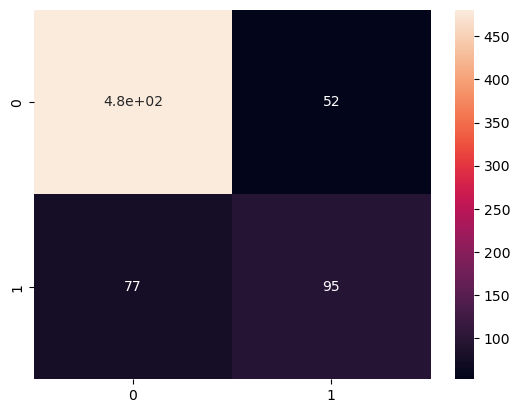

In [90]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

## .- Applying the models with 20% test and 80% training

In [91]:
from sklearn.model_selection import train_test_split

X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5634, 27) (1409, 27) (5634,) (1409,)


In [92]:
y_train.value_counts()

0.0    4113
1.0    1521
Name: Churn, dtype: int64

In [93]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [94]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.734654 (0.031577)
SVM: 0.768721 (0.015972)
KNN: 0.766777 (0.020233)
RFC: 0.785932 (0.020665)
CART: 0.723817 (0.023436)
LR: 0.800855 (0.023010)


Accuracy Score:  0.8126330731014905

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1061
         1.0       0.63      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409


Confusion Matrix: 
 [[943 118]
 [146 202]]


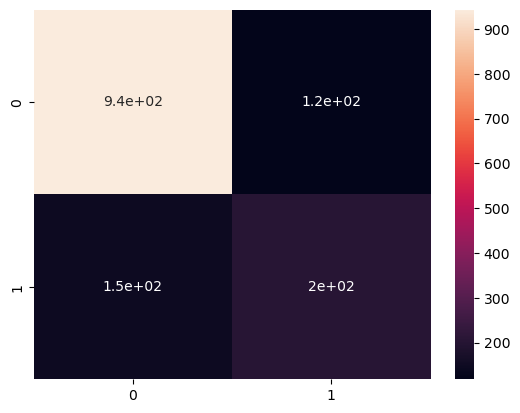

In [95]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

## .- Applying the models with 30% test and 70% training

In [96]:
from sklearn.model_selection import train_test_split

X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(4930, 27) (2113, 27) (4930,) (2113,)


In [97]:
y_train.value_counts()

0.0    3589
1.0    1341
Name: Churn, dtype: int64

In [98]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [99]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.731663 (0.025642)
SVM: 0.765938 (0.017065)
KNN: 0.754780 (0.023579)
RFC: 0.783386 (0.022642)
CART: 0.713199 (0.027677)
LR: 0.802046 (0.027431)


Accuracy Score:  0.8092759110269758

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1585
         1.0       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113


Confusion Matrix: 
 [[1402  183]
 [ 220  308]]


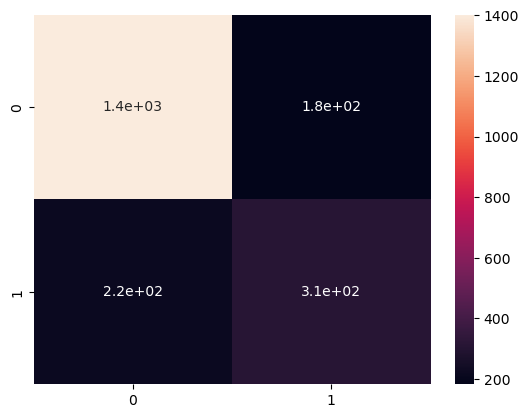

In [100]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

## .- Applying the Logistic Regression model with 20% testing and 80% training using the SMOTE technique

In [101]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [102]:
# SMOTE

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(8226, 27) (1409, 27) (8226,) (1409,)


In [103]:
y_train.value_counts()

0.0    4113
1.0    4113
Name: Churn, dtype: int64

Accuracy Score:  0.7835344215755855

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      1061
         1.0       0.55      0.73      0.62       348

    accuracy                           0.78      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409


Confusion Matrix: 
 [[850 211]
 [ 94 254]]


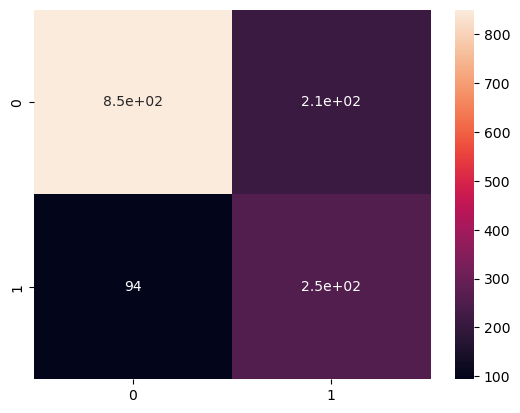

In [104]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

## .- Applying the Logistic Regression model with 20% testing and 80% training using the NearMiss technique

In [105]:
from imblearn.under_sampling import NearMiss

# NearMiss

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an object by calling a methof NearMiss()
nr = NearMiss()

# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(3042, 27) (1409, 27) (3042,) (1409,)


In [106]:
y_train.value_counts()

0.0    1521
1.0    1521
Name: Churn, dtype: int64

Accuracy Score:  0.7395315826827538

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.73      0.81      1061
         1.0       0.48      0.76      0.59       348

    accuracy                           0.74      1409
   macro avg       0.69      0.75      0.70      1409
weighted avg       0.80      0.74      0.76      1409


Confusion Matrix: 
 [[778 283]
 [ 84 264]]


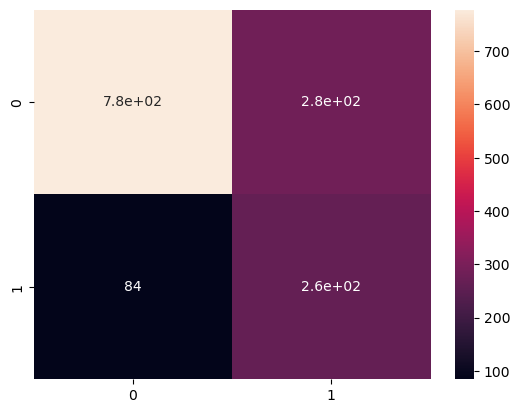

In [107]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

## .-  Applying the Logistic Regression model with 20% testing and 80% training using the PCA technique

In [108]:
df_churn_without_column_churn =  df_churn.drop(["Churn"], axis = 1)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_churn_without_column_churn = scaler.fit_transform(df_churn_without_column_churn)

In [110]:
from sklearn.decomposition import PCA

pca = PCA(0.995).fit(df_churn_without_column_churn)
num_components = pca.n_components_

print('Number of Components:', num_components)

Number of Components: 21


In [111]:
pca = PCA(21)

projected = pca.fit_transform(df_churn_without_column_churn)

projected.shape

(7043, 21)

In [112]:
import pandas as pd

df_projected = pd.DataFrame(projected)

new_col_names = [f"A{i+1}" for i in range(21)]
df_projected.columns = new_col_names

In [113]:
df_projected.head(-5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,-2.533682,-1.636487,4.766816,-1.178482,-0.754779,0.332412,-1.165378,-0.996730,-1.174037,0.739507,...,-0.526443,-1.214335,0.076800,-0.514618,0.320297,1.015489,-0.221902,-1.087969,0.966363,0.107761
1,-0.120288,-1.884143,-0.144440,2.221326,2.535557,0.289063,0.571142,1.191927,1.199087,0.196932,...,-0.380838,1.231994,0.176643,-1.318094,-1.492391,-0.287522,0.233764,0.122597,0.023706,-0.175464
2,-2.251349,-2.004296,-0.389697,1.387488,0.175504,-0.381421,0.942299,1.114504,1.004947,-0.306892,...,-0.056759,-1.629810,-1.360348,-0.506251,-0.878015,0.967765,-0.058381,0.167733,0.726445,0.093094
3,1.241818,-2.293635,4.970538,0.881598,1.743017,1.934556,1.433547,-0.651800,1.050194,0.284612,...,-1.222413,1.146230,-0.227114,-0.795670,1.070947,-1.600741,0.246327,-0.008991,-0.105297,-0.239503
4,-3.679952,1.102973,-0.684061,0.531538,-0.324457,-0.131816,0.034507,-0.143092,-1.026844,0.620899,...,-1.021657,-0.406143,0.730362,-0.197960,-0.156495,-0.601581,0.010724,0.068967,0.395919,-0.376767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,-1.993474,1.081224,-0.609298,1.467218,-0.113061,-1.889382,0.535243,-1.506271,1.013641,-1.083451,...,-0.942773,-0.392880,0.536740,0.024390,-0.323601,-0.156461,-0.014845,-0.120426,-0.507515,-1.026232
7034,1.238558,2.381159,-0.109965,0.210719,0.253159,-1.972952,1.127502,-0.763099,-0.977322,-0.969607,...,-1.400193,-0.385095,-1.646039,-1.663702,-0.349184,0.908271,1.593899,0.044229,-1.083550,-0.349180
7035,-2.031983,1.402089,-0.761343,0.645885,-0.621861,1.332990,1.300874,-0.494992,1.020723,-1.287168,...,-0.339983,-0.307649,0.068360,0.495366,-0.499118,-0.160901,1.591069,-0.075759,0.130198,-0.646827
7036,0.627251,-1.110660,4.545770,-2.487523,2.869219,0.719766,-0.202705,0.745021,-1.227582,1.123653,...,-0.289913,0.948102,0.552512,0.009495,1.399605,0.492929,0.022322,0.410520,1.203209,0.290992


In [114]:
df_projected["Churn"] = df_churn['Churn']

df_projected.head(-5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Churn
0,-2.533682,-1.636487,4.766816,-1.178482,-0.754779,0.332412,-1.165378,-0.996730,-1.174037,0.739507,...,-1.214335,0.076800,-0.514618,0.320297,1.015489,-0.221902,-1.087969,0.966363,0.107761,0.0
1,-0.120288,-1.884143,-0.144440,2.221326,2.535557,0.289063,0.571142,1.191927,1.199087,0.196932,...,1.231994,0.176643,-1.318094,-1.492391,-0.287522,0.233764,0.122597,0.023706,-0.175464,0.0
2,-2.251349,-2.004296,-0.389697,1.387488,0.175504,-0.381421,0.942299,1.114504,1.004947,-0.306892,...,-1.629810,-1.360348,-0.506251,-0.878015,0.967765,-0.058381,0.167733,0.726445,0.093094,1.0
3,1.241818,-2.293635,4.970538,0.881598,1.743017,1.934556,1.433547,-0.651800,1.050194,0.284612,...,1.146230,-0.227114,-0.795670,1.070947,-1.600741,0.246327,-0.008991,-0.105297,-0.239503,0.0
4,-3.679952,1.102973,-0.684061,0.531538,-0.324457,-0.131816,0.034507,-0.143092,-1.026844,0.620899,...,-0.406143,0.730362,-0.197960,-0.156495,-0.601581,0.010724,0.068967,0.395919,-0.376767,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,-1.993474,1.081224,-0.609298,1.467218,-0.113061,-1.889382,0.535243,-1.506271,1.013641,-1.083451,...,-0.392880,0.536740,0.024390,-0.323601,-0.156461,-0.014845,-0.120426,-0.507515,-1.026232,0.0
7034,1.238558,2.381159,-0.109965,0.210719,0.253159,-1.972952,1.127502,-0.763099,-0.977322,-0.969607,...,-0.385095,-1.646039,-1.663702,-0.349184,0.908271,1.593899,0.044229,-1.083550,-0.349180,1.0
7035,-2.031983,1.402089,-0.761343,0.645885,-0.621861,1.332990,1.300874,-0.494992,1.020723,-1.287168,...,-0.307649,0.068360,0.495366,-0.499118,-0.160901,1.591069,-0.075759,0.130198,-0.646827,0.0
7036,0.627251,-1.110660,4.545770,-2.487523,2.869219,0.719766,-0.202705,0.745021,-1.227582,1.123653,...,0.948102,0.552512,0.009495,1.399605,0.492929,0.022322,0.410520,1.203209,0.290992,0.0


In [115]:
X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5634, 21) (1409, 21) (5634,) (1409,)


In [116]:
y_train.value_counts()

0.0    4113
1.0    1521
Name: Churn, dtype: int64

In [117]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.774938 (0.028419)
SVM: 0.792502 (0.021114)
KNN: 0.754327 (0.022609)
RFC: 0.777769 (0.019823)
CART: 0.725945 (0.029929)
LR: 0.798717 (0.022739)


Accuracy Score:  0.8076650106458482

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1061
         1.0       0.62      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.81      1409


Confusion Matrix: 
 [[938 123]
 [148 200]]


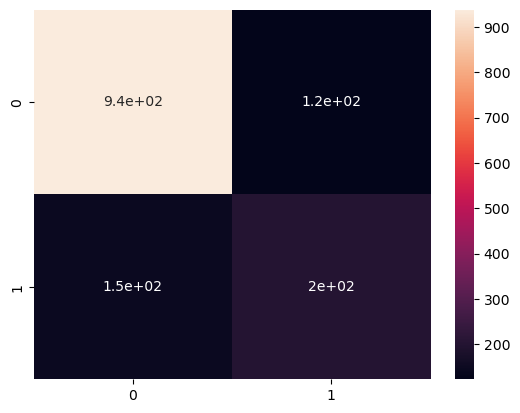

In [118]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

## Observation

After having carried out the different models with different percentages in testing and training, we can conclude the following:

For the data that we are analyzing, the best resulting model is the Logistic Regression with 20% testing and 80% training, which gives us the following information:


The Accuracy Score of the model is 0.8126, which indicates that the model is capable of correctly predicting 81.26% of the cases.


The Classification Report shows us the metrics of precision (precision), recall (recall) and F1-score (f1-score) for each Churn class (0 and 1).


-. Precision tells us how accurate the model is when predicting a given class.

.- Recall indicates how well cases of the given class recover.


.- The F1-score is a combined measure of accuracy and recovery.


After having clarified these points we can indicate that:


The report shows us that the model has a good precision for class 0 (87%) and a moderate precision for class 1 (63%), but the recovery is moderate for class 0 (89%) and low for class 1 (58%). The F1 score also reflects these trends, being highest for class 0 (0.88) and lowest for class 1 (0.61).

The confusion matrix shows us the number of true positives (TP), false positives (FP), true negatives (TN) and false negatives (FN) in the model. In this case, the model correctly predicted 942 Churn equals 0 (TN) and 203 Churn equals 1 (TP).

However, it also incorrectly predicted 119 instances of Churn equal to 0 as Churn equal to 1 (FP) and 145 instances of Churn equal to 1 as Churn equal to 0 (FN).

In general, the Logistic Regression model has good accuracy in predicting the majority class of Churn equal to 0 but has difficulties correctly predicting the minority class of Churn equal to 1. This is because our data is biased, which mostly has Churn data equal to 0 at 73.46% and Churn data equal to 1 at 26.54%.

In order to remedy this bias, we apply the Logistic Regression model with 20% testing and 80% training using the SMOTE technique to add synthetic data to our minority variable equivalent to Churn equal to 1


In terms of Accuracy Score, the Logistic Regression model without applying the SMOTE technique (0.8126) performs better than the model applying the SMOTE technique (0.7849).

However, when the Classification Report metrics are analyzed, it is observed that the model applying the SMOTE technique presents better performance in terms of recall for the minority class (Churn = 1).

We can see this reflected in the confusion matrix, where it is observed that the model applying the SMOTE technique has fewer false negatives (99) than the model without the technique (145).


In general, the choice of the model depends on the business objective, for this reason, an initial analysis of the business and our data is of the utmost importance. This way we will be able to detect the importance that is given to each of the metrics that we are evaluating.

As we already know in the previous analysis, we are looking for a model that has a better performance for the detection of the minority class, in this case, the Clients with Churn (1), knowing this we can opt for the model that uses the SMOTE technique.

# Conclusion

After reviewing our data, we can indicate the following:

The products that must be reviewed since they may have some quality and/or price problems are the Phone Service service and the Internet service with Fiber Optic. On the other hand, we can see that the Internet Service through Fiber Optic is directly associated with the Phone Service. What would be the reason for this? With this analysis, we cannot know, but we advise executives to observe these services since of the clients that have Churn, these two services are critical, which leads to problems with services derived from the Internet, which are Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movie since they depend directly on the Internet Service.

In addition to the observations we have on the characteristics of the products, we also have observations on the characteristics of the contracts and the form of payment.
These services caught our attention since within Churn a large percentage have a month-to-month contract and apparently have problems with the form of payment through Electronic Check.

In conclusion, we advise the executives of the company to observe and take action on these products, since in this way the Churn can be reduced and at the same time increase the income of the company and increase customer loyalty.

On the other hand, we can also observe that the probability that the clients have Churn with the critical services that were detected is 11.20%. At first glance, this probability seems low, but for the customers that are within the Churn with these characteristics, the company has lost a monthly income of €68,282, which is not a minor amount.

Bringing in a new customer is more expensive than retaining one.

These are the following recommendations that we can deliver to company executives in order to reduce Churn and increase revenue:

      1. Understand why your customers cancel.
    
      2. Identify the customers most likely to leave.
    
      3. Build a Customer Success team.
    
      4. Value the customer experience.

      5. Do not stop listening to who uses your service.

      6. Align expectations.

      7. Take action based on the suggestions received.

## Bibliography

Reference : 

- Stack Overflow [online] (May 10, 2021) Available at: https://stackoverflow.com/questions/67474348/how-do-i-create-a-bar-chart-with-percentage-values-in-python-plotly-express

- GeeksforGeeks [online] (16 Jul, 2020) Available at: https://www.geeksforgeeks.org/python-binomial-distribution/?ref=gcse

- Scribbr [online] Published on November 5, 2020 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/standard-normal-distribution/

- nbconvert documentation, Jupyter Development Team [online] Available at: https://nbconvert.readthedocs.io/en/latest/install.html

- Kaggle, Updated 5 Years Ago by Blastchar [online] Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- W3Schools, Copyright 1999-2023 by Refsnes Data [online] Available at: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php

- Copyright © the Python Graph Gallery 2018 [online] Available at: https://www.python-graph-gallery.com/barplot/

- Scribbr [online] Published on May 13, 2022 by Shaun Turney. Available at: https://www.scribbr.com/statistics/poisson-distribution/

- By Abhishek Wasnik / October 26, 2020. Available at: https://www.askpython.com/python/normal-distribution

- By GreekDataGuy / Jan 2, 2020. Available at: https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2

- GeeksforGeeks., 2021. Exploratory Data Analysis by KattamuriMeghna. Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

- Scribbr, Published on January 28, 2020 by Rebecca Bevans. Available at: https://www.scribbr.com/statistics/statistical-tests/

- Scribbr, Published on December 8, 2021 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/missing-data/

- W3schools, Pandas DataFrame astype() Method. Available at: https://www.w3schools.com/python/pandas/ref_df_astype.asp

- Microsoft, Normalize Data component. Article 11/04/2021. Available at: https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2

- Scikit-Learn, sklearn.preprocessing.StandardScaler, Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Analytics Vidhya by Aniruddha Bhandari — Published On April 3, 2020. Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

- GeeksforGeeks. ML | Principal Component Analysis(PCA), by aishwarya.27. Available at: https://www.geeksforgeeks.org/ml-principal-component-analysispca/

- Scikit-Learn, sklearn.decomposition.PCA. Available at:https://scikitlearn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- Medium Dec 25, 2019, by Aayush Bajaj. Available at: https://towardsdatascience.com/what-does-your-classification-metric-tell-about-your-data-4a8f35408a8b#:~:text=A%20low%20recall%20score%20